In [30]:
import uproot 
import argparse
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm

# parser=argparse.ArgumentParser()
# parser.add_argument('file')
# args=parser.parse_args()
# f=args.file
f='pmt_timing_6_8_24.root'
print('Opening file:',f)

with uproot.open(f) as file:
    
    meta_tree=file['meta']
    output_tree=file['output']
    
    #print(meta_tree.keys())
    
    pmt_type=meta_tree['pmtType'].array() # 0=8" 2=12" 3=10"
    
    hit_time=output_tree['mcPEHitTime'].array()
    fe_time=output_tree['mcPEFrontEndTime'].array()
    pmt_id=output_tree['mcPMTID'].array()
    pmt_npe=output_tree['mcPMTNPE'].array()
    
    hit_time=ak.flatten(hit_time)
    fe_time=ak.flatten(fe_time)
    pmt_id=ak.flatten(pmt_id)
    pmt_npe=ak.flatten(pmt_npe)
    pmt_type=ak.flatten(pmt_type)
    
    print('********************')
    print('id',len(pmt_id),pmt_id)
    print('npe',len(pmt_npe),pmt_npe)
    print('type',len(pmt_type),pmt_type)
    print('hit time',len(hit_time),hit_time)
    print('fe time',len(fe_time),fe_time)
    print('********************')
    
    counter=0
    r14688_hit_time_new=[]
    r14688_fe_time_new=[]
    r11780_hit_time_new=[]
    r11780_fe_time_new=[]
    r7081_hit_time_new=[]
    r7081_fe_time_new=[]
    # Loop through id of all pmt that were hit
    for i in tqdm(range(len(pmt_id))):
        # Loop through each hit
        for j in range(pmt_npe[i]):
            # See if it is a 
            if (pmt_type[pmt_id[i]]==0):
                r14688_hit_time_new.append(hit_time[counter])
                r14688_fe_time_new.append(fe_time[counter])
            # See if it is a 12" 
            elif (pmt_type[pmt_id[i]]==2):
#                 print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r11780_hit_time_new.append(hit_time[counter])
                r11780_fe_time_new.append(fe_time[counter])
            # See if it is a 10"
            elif (pmt_type[pmt_id[i]]==3):
#                 print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r7081_hit_time_new.append(hit_time[counter])
                r7081_fe_time_new.append(fe_time[counter])
            counter+=1
    print('********************')

Opening file: pmt_timing_6_8_24.root
********************
id 220128 [103, 154, 18, 217, 189, 97, 199, 160, ..., 108, 223, 61, 128, 46, 89, 72, 189]
npe 220128 [4, 4, 6, 8, 2, 2, 3, 6, 2, 2, 7, 3, 5, ..., 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1]
type 241 [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
hit time 774137 [5.48, 6.51, 7.71, 10.3, 7.87, 8.67, ..., 10.8, 8.04, 9.1, 12.3, 14.8, 19.5]
fe time 774137 [5.55, 6.93, 7.81, 10.4, 8.98, 8.7, 14.6, ..., 10.7, 11, 9.15, 12.9, 15, 26]
********************


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220128/220128 [01:14<00:00, 2961.24it/s]

********************


In [31]:
r14688_deltat_new=[]
for i in range(len(r14688_hit_time_new)):
    r14688_deltat_new.append(r14688_fe_time_new[i]-r14688_hit_time_new[i])


r11780_deltat_new=[]
for i in range(len(r11780_hit_time_new)):
    r11780_deltat_new.append(r11780_fe_time_new[i]-r11780_hit_time_new[i])
    
    

r7081_deltat_new=[]
for i in range(len(r7081_hit_time_new)):
    r7081_deltat_new.append(r7081_fe_time_new[i]-r7081_hit_time_new[i])



9.99999999999996


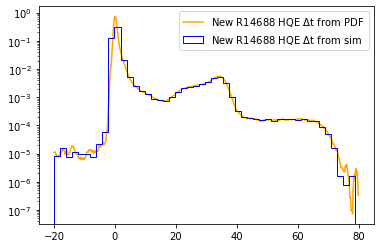

In [32]:
time_r14688_new=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r14688_new=[1.1144327233193849e-05, 1.0959767002260244e-05, 1.1488122496911807e-05, 1.1010439085073696e-05, 1.0844924166929868e-05, 1.0369562588789679e-05, 9.037162676553716e-06, 8.687069666826983e-06, 9.055479080077627e-06, 8.315257301335861e-06, 8.441543977885034e-06, 8.019335606469651e-06, 8.029577751032017e-06, 8.133378785221605e-06, 7.897655388496292e-06, 7.77643008221471e-06, 8.22381339628287e-06, 8.388717011758658e-06, 8.785508173331407e-06, 9.482009568803659e-06, 1.0987938991991602e-05, 1.1119201034143823e-05, 1.1748103508982774e-05, 1.0912141009174933e-05, 1.1663779878949656e-05, 1.2110730126772026e-05, 1.2015644770190887e-05, 1.3054915619003701e-05, 1.3856645583625488e-05, 1.413000403047355e-05, 1.4520835735292052e-05, 1.5295526104911323e-05, 1.3887570368512324e-05, 1.2475615877539717e-05, 1.2318908564691243e-05, 1.0228315022023073e-05, 9.459587518176562e-06, 9.918139045502902e-06, 1.145624261304343e-05, 1.1275936836098914e-05, 1.2081517930034913e-05, 1.2779187695184506e-05, 1.1193868973377688e-05, 9.601863351243468e-06, 8.964454749068162e-06, 9.068283881962193e-06, 9.015247508056714e-06, 9.095437850433231e-06, 9.173145948900767e-06, 9.602644208962519e-06, 1.1077661206224522e-05, 1.1256285910360908e-05, 1.1322189219933844e-05, 1.3267277709696475e-05, 1.4719972022560263e-05, 1.5245981679541546e-05, 1.6161227576783244e-05, 1.7178728683320627e-05, 1.890921365677092e-05, 1.7903389931773158e-05, 1.8059971134735034e-05, 1.7746336832507828e-05, 1.7973888534450937e-05, 1.7117978758729584e-05, 1.7635820640643804e-05, 1.6043913068569888e-05, 1.4285543106288608e-05, 1.4143013287708334e-05, 1.2591588094965951e-05, 1.0985987890630157e-05, 1.084349575524716e-05, 1.0420414544930233e-05, 1.0063929569909227e-05, 9.484586231696355e-06, 9.340958510082986e-06, 8.970571601920261e-06, 9.61786730171321e-06, 9.60258605627442e-06, 8.519324252452077e-06, 7.827829054769424e-06, 6.860435459135572e-06, 6.818241028519216e-06, 6.92963756767638e-06, 6.971771481514253e-06, 7.4066742440438466e-06, 7.269542312490217e-06, 7.4476880546823485e-06, 6.275459582861762e-06, 6.728292964039068e-06, 6.803611619145234e-06, 6.196132650606093e-06, 7.164207488068494e-06, 6.933170141381108e-06, 6.78472145134641e-06, 6.098984435687534e-06, 6.456839429617869e-06, 6.600229015879612e-06, 6.686935507013824e-06, 7.1532347509643254e-06, 6.184091878273914e-06, 6.700998408374782e-06, 6.730726775181737e-06, 6.790616558707309e-06, 7.4187272496916344e-06, 7.613739796718482e-06, 8.786303635344947e-06, 9.92515753840401e-06, 1.1071968931920218e-05, 1.1204695084435022e-05, 1.1201872836244765e-05, 1.1376007639756904e-05, 1.1952229958184605e-05, 1.1372584797205956e-05, 1.2532447603954807e-05, 1.3542864030081325e-05, 1.360020299024327e-05, 1.331011616144496e-05, 1.36617805218534e-05, 1.335515240721168e-05, 1.3530486265288505e-05, 1.2713653734753358e-05, 1.2523033369179275e-05, 1.2714461095359086e-05, 1.3336578426680584e-05, 1.3035654956332638e-05, 1.1392187525529685e-05, 1.1677601136232401e-05, 1.1683037636703539e-05, 1.2605744163933673e-05, 1.0622922683141996e-05, 1.1738964855931042e-05, 1.1801556607071736e-05, 1.0747196835815673e-05, 1.2072510603050195e-05, 1.257684425969953e-05, 1.1684909537579348e-05, 1.1223558654157137e-05, 1.2060162655459073e-05, 1.2147352491840562e-05, 1.1897386384354451e-05, 1.2146285514864765e-05, 1.2065034325827027e-05, 1.2521467383302798e-05, 1.2463158894656692e-05, 1.2761771044625358e-05, 1.258982964089413e-05, 1.6341032920922202e-05, 1.8959288260063862e-05, 1.8854012587544745e-05, 1.67028772212557e-05, 1.8730305043380745e-05, 1.8922284710214686e-05, 1.8034037140780804e-05, 1.7697714806842142e-05, 1.851038251511494e-05, 1.9502147069144658e-05, 2.0744129162513103e-05, 2.1563397460078044e-05, 2.1470552300231766e-05, 2.2047095104724756e-05, 2.4731824875595364e-05, 2.3065706798602373e-05, 2.02851987475007e-05, 2.1972171901600026e-05, 2.2853674377112912e-05, 2.0878892979838256e-05, 2.3493699727369244e-05, 2.417532904650085e-05, 2.5839942115990426e-05, 2.8022280223343055e-05, 3.059954383818188e-05, 3.9711159572611404e-05, 5.2477683324530104e-05, 6.66413984028494e-05, 6.204067590465628e-05, 9.582083731590211e-05, 0.00013812915712475648, 0.0002201814246806004, 0.00042625004235922884, 0.0006177211977211151, 0.0009540667952815272, 0.0016237014284615462, 0.0026003346327703337, 0.004198390712277286, 0.006450073273863008, 0.00919287376651613, 0.011148589097335489, 0.012671940635581788, 0.016948736908184898, 0.025268169712045208, 0.04103308252044566, 0.0657262322979495, 0.10413959839993668, 0.1584311535023438, 0.2366177739797469, 0.3335989688991775, 0.4458267103882094, 0.5596752466286042, 0.6538744589593507, 0.718152590464578, 0.7520507444851393, 0.7183253326716594, 0.6628851497336458, 0.5842459284790811, 0.494798749050402, 0.40532818743262156, 0.3250185422869829, 0.260033841829853, 0.2080555891959937, 0.16735885955273208, 0.13700407182098887, 0.1143996517445982, 0.09695665674821362, 0.08298636740522422, 0.07229163141679196, 0.06282156104503898, 0.05462760728512485, 0.048384967317418155, 0.04216607240907413, 0.03813606678918074, 0.034985563289459815, 0.032189050216825735, 0.02924633866143351, 0.027566604911089348, 0.02553343923025137, 0.023450186222138118, 0.02171465294694144, 0.019994244036384515, 0.018402451502320394, 0.016949721311171808, 0.015697532696848197, 0.014576764394809793, 0.0135205058710968, 0.012487902481612205, 0.011627746828469097, 0.010850323091342354, 0.010103313832705357, 0.009352062286963279, 0.008748053310763212, 0.008111854131775745, 0.00760879579207471, 0.007097450439013005, 0.006699024744282259, 0.006213628790467661, 0.005881534708725131, 0.005518052196712161, 0.005215522772246138, 0.004945224805988301, 0.004680651971371675, 0.004448776806273547, 0.004245183995947601, 0.004062390504938216, 0.003881342182228583, 0.0037355809695113094, 0.003587916852003688, 0.0034591916171977893, 0.003335350716577748, 0.003224440590763262, 0.003127154718288878, 0.0030278277113650917, 0.0029282341258913083, 0.0028356392256985107, 0.0027541043769824386, 0.0026808906454947757, 0.002619015456127587, 0.00254555105473625, 0.0024985185830537432, 0.0024356859772110815, 0.002373094694847524, 0.0023212262732076085, 0.0022661145220260344, 0.00221925560021634, 0.00217040966437204, 0.0021328812714390025, 0.002093002830283849, 0.0020595012287011653, 0.0020187389144272374, 0.0019763095758385794, 0.0019319489904986332, 0.001891509859913616, 0.0018557153137657323, 0.0018201939229904676, 0.0017976965943578445, 0.0017679651240903621, 0.0017395253302645883, 0.0017123989780785287, 0.0016823109763748822, 0.0016516772721449514, 0.0016236032616311856, 0.001592924348477693, 0.0015630242083143826, 0.0015475635708010658, 0.0015280924917018654, 0.0015135906077522723, 0.001491782656682093, 0.001475082091614706, 0.0014525537827791677, 0.001431032325470662, 0.0014063810719157914, 0.0013883143482866429, 0.0013776256150019592, 0.0013669015681712516, 0.001355518464320961, 0.0013404685695716661, 0.0013306938625036538, 0.0013165890520845987, 0.0012939573178737478, 0.001275750612553786, 0.001258988587159497, 0.0012453888105219326, 0.0012279177073506846, 0.001212552805285178, 0.001200868760350576, 0.0011874275190831211, 0.0011702544778268839, 0.0011483466110716067, 0.0011273723868273368, 0.001110556070543959, 0.0010973613164462334, 0.0010788060151658676, 0.001063135669303487, 0.0010429374613979536, 0.0010267039470541323, 0.0010117334403718467, 0.0009940162815376436, 0.0009783598036008745, 0.0009668026142962812, 0.0009470159071472943, 0.0009368241997310432, 0.0009262498268023219, 0.0009210567279734932, 0.0009118896376568643, 0.000898751625216979, 0.0008821657332798858, 0.0008722359531649846, 0.0008674769892374499, 0.0008607858820949526, 0.0008525906791436616, 0.0008428716286049387, 0.0008367169810121047, 0.0008333448814764376, 0.0008217276824595053, 0.0008157221003790297, 0.0008084226910938256, 0.0008009401531520935, 0.0007895242348717331, 0.0007833970741789035, 0.0007823302855710188, 0.0007791703117425699, 0.0007738509945418088, 0.0007681977715835997, 0.0007654610159820815, 0.0007655857890051022, 0.0007631068704476203, 0.0007597941796294752, 0.000754201410854801, 0.0007521643363200863, 0.0007504631822462382, 0.0007437555189017427, 0.0007443535944613456, 0.0007503980296961118, 0.0007536046505246879, 0.000749931089351343, 0.0007485045054699258, 0.0007465835778200729, 0.0007461565767116742, 0.0007486414997977705, 0.0007459893316571067, 0.0007531416445300351, 0.0007617717359998554, 0.0007716844472488727, 0.000780975915800232, 0.0007943566928195084, 0.0008062620331158673, 0.0008161454597940112, 0.000820909472447792, 0.0008291885298812343, 0.0008468162375717172, 0.0008676536766967434, 0.000888445734865917, 0.0009046136115182797, 0.0009196954302845111, 0.0009420381458936837, 0.000960703644158594, 0.0009783293710376672, 0.000995952129586003, 0.0010165845256905578, 0.001034821816710026, 0.0010599703835194956, 0.0010767155857811892, 0.0010970341775119335, 0.0011182938951346908, 0.0011413674283555896, 0.0011655078829588183, 0.001186583930737431, 0.001211686691456508, 0.0012403767682633653, 0.001271719716985659, 0.0012933012982633213, 0.0013194461807276895, 0.0013464043380208687, 0.0013762464452366607, 0.0014070914795009744, 0.001434141726242951, 0.00147043017441971, 0.0015050282258141467, 0.0015391776826192674, 0.0015718081796005754, 0.0015992737661116494, 0.0016347804937520763, 0.0016639219414118062, 0.0016942902841069246, 0.001715864007996763, 0.0017487964173346856, 0.0017806493936615895, 0.0018081444858763242, 0.0018227164455618123, 0.0018417758134942656, 0.0018672754420157218, 0.0018931851200560865, 0.0019181010946105346, 0.0019366033681178338, 0.001955033656813753, 0.001979835016838766, 0.001996982203644561, 0.002023362105924002, 0.002049636443742628, 0.002074916469944426, 0.0020949264071473033, 0.0021167441503665615, 0.0021350506284446243, 0.002163544451400637, 0.002193382932987499, 0.0022108615541502085, 0.002226026897223393, 0.002245085761108334, 0.002269266887252203, 0.0022886273053780463, 0.0023009765307031955, 0.0023218074627302026, 0.0023352081168450116, 0.0023388061847434724, 0.0023424529197219085, 0.002353237400849425, 0.0023627196241085857, 0.002370077161952418, 0.002370766335295434, 0.0023705228482172004, 0.0023769916733768124, 0.0023921603655071067, 0.002391987650907079, 0.0023975907048355235, 0.002403181581462665, 0.0024079778608902037, 0.0024170996159350133, 0.00241881894613777, 0.002429628619186137, 0.00245215989098806, 0.0024634225253078353, 0.0024694048564525258, 0.0024948160422541697, 0.002522516967661019, 0.0025406328524678, 0.00256068196197578, 0.0025744916485306263, 0.002601358497497148, 0.002612151090438166, 0.0026294227354475763, 0.002645041809795993, 0.0026640640779348884, 0.0026826965566996938, 0.0027069806240969806, 0.0027143755833014937, 0.0027280531795912453, 0.0027449476252591875, 0.002745477260680273, 0.002760911222780579, 0.002774922252127659, 0.0027882839012036706, 0.00279538687412394, 0.002804852346148481, 0.0028210233951113037, 0.0028338537189541587, 0.0028453549681541567, 0.002850701223975205, 0.0028648410369180835, 0.0028723990348066505, 0.0028873940715262725, 0.0029129521230349654, 0.002934309714690789, 0.002962509354890216, 0.002971927729491675, 0.0029886799569287317, 0.0030171279320168713, 0.0030428487099566246, 0.0030740704036791217, 0.00310324267055036, 0.0031285965569649234, 0.003173806203370929, 0.0032094725196275702, 0.0032486119926114243, 0.0032865472735198816, 0.0033256297403546895, 0.0033490083126525767, 0.003389041986130826, 0.0034331214661688643, 0.003480718717545488, 0.0035305561589343186, 0.003567617379342534, 0.0036183870762225598, 0.003671047749634425, 0.0037229510060022577, 0.0037780294549937155, 0.003834872515034146, 0.0038943711377097496, 0.003961162471550299, 0.00403303425289908, 0.004100644612574087, 0.004191873796239375, 0.004261344873024191, 0.004336788979607458, 0.004419609637683699, 0.00449963213316718, 0.004582378019013465, 0.0046624923134119915, 0.004734788089462109, 0.004821903263060365, 0.004913152564828107, 0.004978838295759001, 0.005064386976959056, 0.005124580178771816, 0.005190625755701268, 0.005262579938839848, 0.00531283981840925, 0.005372261324521064, 0.005428868062128403, 0.005468019542045931, 0.005514150552324867, 0.005556611244844012, 0.0055961160623271096, 0.005609076572716606, 0.005614121838369308, 0.005611241166062301, 0.005614732669664956, 0.005587811017544575, 0.005571539618291562, 0.005534129660425989, 0.005486472044681895, 0.0054273732963742395, 0.005358710962446138, 0.005273682996320872, 0.005183012395754195, 0.005075221876390266, 0.0049536334881395945, 0.004826328300005692, 0.004707429165814142, 0.004567536927820723, 0.004418524617412578, 0.004263105143382988, 0.004111636786109895, 0.003949103285831735, 0.0037846155545323192, 0.00361750529847856, 0.003460092410082308, 0.0032947501360731245, 0.003126044901197592, 0.0029756152387134076, 0.0028198780030555515, 0.0026686009626385775, 0.002509066843529267, 0.0023601682413314775, 0.0022237595910357864, 0.0020939913660005145, 0.001967787261959608, 0.0018381240158629104, 0.0017207122662715052, 0.0016109840642261127, 0.0015085514123938817, 0.0014069234612935112, 0.0013114208010594328, 0.001225169921851552, 0.0011365071498450605, 0.0010552731470765899, 0.0009814902180836356, 0.0009158555421657888, 0.0008538999977428371, 0.0007957615484735299, 0.0007383453110130785, 0.0006864412316121976, 0.0006422781111802163, 0.0005980501519436105, 0.00055668633042879, 0.0005171744072190784, 0.0004836849770344118, 0.00045621579079320663, 0.0004315903063897875, 0.0004054686025810508, 0.0003840049602656446, 0.00036437773738828345, 0.00034976524673713353, 0.00033608392259816517, 0.0003234823295555477, 0.00031423705462158664, 0.0003049518813900137, 0.0002970446666946267, 0.00028917149855283515, 0.0002849293148878358, 0.00027878712809357564, 0.0002686334280949194, 0.0002620459775710228, 0.0002544070873067016, 0.0002494275139531709, 0.0002449504438744849, 0.00024032969082385706, 0.00023452127913035028, 0.0002293610943001911, 0.00022687325274817826, 0.00021992655545958277, 0.00021450052891058193, 0.00021235617050944705, 0.00020942182400990407, 0.00020468055422689905, 0.00020116253872422727, 0.0001990113140069781, 0.0001947769563544608, 0.000193266436194115, 0.00019135235162674537, 0.00018922650983391455, 0.00018765173151384524, 0.0001855466039906101, 0.00018533103359006923, 0.0001802157222562531, 0.000178475948616063, 0.0001791799850566418, 0.00017821614012226254, 0.00017944081388823112, 0.0001797004466724035, 0.00018007259020251217, 0.00018115731669104767, 0.00018350279888841174, 0.00018123177242382018, 0.00017975605810220942, 0.00018066836994760094, 0.00017898629867019799, 0.00017807754198458222, 0.00017543596506781412, 0.00017628171089295702, 0.00017672084743847608, 0.00017639701165101363, 0.00017766338566203854, 0.00017952488699989492, 0.00017681535581519361, 0.00017698678268119255, 0.00017499585407431062, 0.00017240516850122365, 0.00017107534143334495, 0.00017113178423575648, 0.00017147760480098906, 0.00017094924130378324, 0.0001740436406897519, 0.0001735364891684093, 0.00017072585850281153, 0.0001700324133760481, 0.00016974853053650497, 0.00016507215639699214, 0.00015963774269803598, 0.00016083833369986717, 0.00015761587326949806, 0.0001560120108110612, 0.00015458595654519423, 0.0001545827313974517, 0.0001541241546965213, 0.00014988993147145623, 0.00014706097988740745, 0.00014316535763796422, 0.0001440617686169997, 0.0001459296011838563, 0.00014423632517814383, 0.00014287621378897787, 0.000143945698676746, 0.0001437793009762678, 0.00014408607023846975, 0.00014331653106590934, 0.0001475311052152411, 0.00015023931302544469, 0.00015053436187716682, 0.00015214434479708146, 0.00015086553382661957, 0.00015216351263872867, 0.00015390229290972906, 0.00015335876014442603, 0.00015136975525548055, 0.0001507882517014979, 0.0001536146692804952, 0.00015516131961275606, 0.00015665970403483297, 0.00016126247966299134, 0.00015940622719437823, 0.00015942776155135596, 0.0001552856434517097, 0.00015713916293914868, 0.00015794058416674226, 0.00016061807713646498, 0.0001581223456393515, 0.0001574131405947336, 0.0001573260569893161, 0.0001587636553662956, 0.00016031734381395535, 0.00015754890847839172, 0.0001585632604144647, 0.00015899471085869672, 0.00015480230082743574, 0.0001519627764786255, 0.0001511549385477487, 0.0001520865111465686, 0.00015308152695297212, 0.00015123722158346826, 0.00015050229397338692, 0.00015019493984058955, 0.00015370190594609883, 0.0001560610701296568, 0.00015640101627127702, 0.00015500014872143892, 0.00015538148157959292, 0.00015528541513652386, 0.00015726653817260144, 0.00015485440788966768, 0.0001562111484287324, 0.00015463838717702676, 0.00015299455651679426, 0.00015335302133597631, 0.0001554225626287317, 0.00015603074866537233, 0.00015504324594912687, 0.00015214068851395472, 0.00014873085320309408, 0.00014836270306205774, 0.00015237129572080472, 0.0001533910353868689, 0.0001557012800759527, 0.00015353264391477828, 0.00015649231226629178, 0.00015919108329343423, 0.00016199270260167935, 0.00016360847105366296, 0.00016430746636057698, 0.00016305130333788483, 0.00016283395847096382, 0.0001632800650510014, 0.0001671620648156306, 0.00016855163593066963, 0.00016764130150460495, 0.0001659846703871653, 0.00016621586995153525, 0.00016304030731347332, 0.00016232409503985786, 0.00015898776593197456, 0.00015734994931392742, 0.00015512230376732282, 0.0001560943272299143, 0.00015685965699926163, 0.0001563382118386309, 0.00015685680319816884, 0.000157590370870775, 0.0001568169959493588, 0.00015472665717915698, 0.00015650884043195, 0.00015782093274999302, 0.00015669365666850962, 0.00015677901234035762, 0.0001559574402458586, 0.00015960741777580557, 0.00016020794963379488, 0.0001614251222487994, 0.0001612033025391671, 0.0001600590548836503, 0.00016291156309878032, 0.0001621878136520534, 0.0001641650576618243, 0.00016088282366229372, 0.00016213915068213647, 0.000160805895259358, 0.00016213397189701506, 0.00016201280429481438, 0.0001629694981424867, 0.00016282184805463648, 0.00016424584938310377, 0.000164147281495098, 0.0001627280325732157, 0.00016399273137433413, 0.00016349801811718422, 0.00016348253785305574, 0.00016395687640400136, 0.00016411516843064188, 0.00016601932372281448, 0.00016670673398005504, 0.00016665118682366166, 0.0001645105295937248, 0.00016384605375051667, 0.00016445676426230524, 0.00016903573382056765, 0.00016811236121398306, 0.0001679973415350087, 0.00017053698784764176, 0.00016889056553663433, 0.00017353682651837928, 0.0001718196070786453, 0.00017143917002733293, 0.00016933336588205274, 0.0001705430237175396, 0.0001730341171943681, 0.0001718646557343943, 0.00017061407556967243, 0.0001707950528008926, 0.0001696870554254822, 0.00016527981334754237, 0.00016477485528688062, 0.00016410990261838011, 0.0001622885762437142, 0.00016067395008444182, 0.00015779086497945286, 0.00015994500321349359, 0.00016182001113596928, 0.00015953493849908289, 0.0001572107081472771, 0.00015524162546730203, 0.0001570122150438598, 0.0001567385532884759, 0.00015683611641503214, 0.0001555154259729587, 0.00015645779399843572, 0.00015437229626009337, 0.00015517959074089218, 0.00015461602074702457, 0.00015599745291146463, 0.0001539231412448643, 0.00015139145159608438, 0.0001502260071697453, 0.00014938148331196133, 0.0001518590326342885, 0.00015214561743613078, 0.00015300663429776846, 0.00015153019922323682, 0.00015116383453036192, 0.0001504539484210382, 0.00015044178270323097, 0.00015140285103877724, 0.0001519197589760584, 0.00015159997316022798, 0.0001490525337036409, 0.00014878837904786876, 0.0001465745639952306, 0.00014629496852634926, 0.00015182050737126088, 0.00014826664204811764, 0.00014536429414245533, 0.00014163931833367901, 0.00014195829136494787, 0.00014121450903857913, 0.0001392218079995991, 0.0001366110314297334, 0.0001332489773851729, 0.00012997587779633348, 0.00012859578499050062, 0.00012919574557386756, 0.00012731155691213253, 0.00012578533805354932, 0.00012213047181486433, 0.00011557073196789713, 0.00011488912613927232, 0.00011362039502704857, 0.00011252846217997638, 0.00011048928655939165, 0.00010810907926466297, 0.00010824928944413069, 0.00010472982062138144, 0.0001036113829611978, 0.00010179637677445258, 9.933466206445652e-05, 9.585582809551696e-05, 9.505744266429641e-05, 9.254984256332107e-05, 8.961784861039007e-05, 8.895597779190082e-05, 8.734483570222815e-05, 8.535510910309738e-05, 8.220822881494132e-05, 7.934500158117179e-05, 7.855330922370902e-05, 7.540213744873354e-05, 7.219297125302496e-05, 6.969444949802883e-05, 6.738064454276528e-05, 6.584540745749387e-05, 6.508100469333075e-05, 6.212023499443836e-05, 6.068724073276165e-05, 5.727275011812934e-05, 5.3558872271894754e-05, 5.0879751869207185e-05, 4.965822533417624e-05, 4.882411910363552e-05, 4.7352825819507026e-05, 4.42170019035676e-05, 4.098181722327934e-05, 3.996665498878605e-05, 3.851266311646705e-05, 3.70222273279634e-05, 3.506254412646893e-05, 3.186725655334301e-05, 3.0066821877072438e-05, 2.8583861929972973e-05, 2.895627696235639e-05, 2.7758405767113907e-05, 2.4781170596625004e-05, 2.2293589551488006e-05, 2.1538869887466414e-05, 2.142792569846001e-05, 2.0922781586931406e-05, 2.1224488041123833e-05, 1.9416337225180633e-05, 1.910614271639577e-05, 1.731347190101684e-05, 1.6449182372187445e-05, 1.4658355584180286e-05, 1.3677875591552445e-05, 1.3121944443709679e-05, 1.3130939361258546e-05, 1.2448634644657492e-05, 1.2184207533383484e-05, 1.2185424262747283e-05, 1.0872190345398521e-05, 9.31950493849071e-06, 8.053284924825494e-06, 6.780153186468945e-06, 6.712877096229578e-06, 6.824446231542651e-06, 5.641291839371301e-06, 4.76990508686811e-06, 4.733148855141164e-06, 3.822241613877016e-06, 3.557840561214591e-06, 3.1535115571159836e-06, 3.202295767005467e-06, 3.285806635658114e-06, 3.0867999974646e-06, 3.064937456068795e-06, 2.819077294177226e-06, 2.494034258312806e-06, 2.4674071107126504e-06, 2.4577912803083333e-06, 2.6666694742270584e-06, 2.3634919835487775e-06, 2.254470057223544e-06, 2.218902165932386e-06, 3.5902282949216657e-06, 3.6589417507911752e-06, 3.6116596739093867e-06, 3.4063433539988292e-06, 3.577002767652972e-06, 4.211675556826252e-06, 3.307076142508975e-06, 3.1882526367055934e-06, 2.4705573233341786e-06, 1.8788239047286686e-06, 1.5902637948470793e-06, 1.4519952516026354e-06, 1.583123975583051e-06, 9.131285810715073e-07, 7.889257922267908e-07, 3.829110007057107e-07, 2.6892633956420014e-07, 2.6137046739681245e-07, 2.786576919642552e-07, 1.593543266898049e-07, 9.452127461104857e-08, 1.007659205407821e-07, 1.007659205407821e-07, 1.007659205407821e-07, 7.239021168169321e-08, 7.239021168169321e-08, 5.527976551768116e-07, 5.527976551768116e-07, 1.2075120211652732e-06, 1.1902247965978308e-06, 1.8449391625862934e-06, 1.7960808214017768e-06, 1.7960808214017768e-06, 1.141366455413314e-06, 2.4507951873902386e-06, 2.9845536318637905e-06, 1.7183890561215304e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 9.879049784744538e-07, 9.879049784744538e-07, 3.3319061248599196e-07, 3.3319061248599196e-07]
for i in range(len(prob_r14688_new)):
    prob_r11780_new[i]=prob_r14688_new[i]/0.1
    
plt.plot(time_r14688_new,prob_r14688_new,label='New R14688 HQE $\Delta$t from PDF',color='orange')



sum=0
for i in prob_r14688_new:
    sum+=i
print(sum)


plt.hist(r14688_deltat_new,bins=50,density=True,histtype='step',color='blue',label='New R14688 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
#plt.ylim(1e-3,3.5e-1)

9.99999999999999


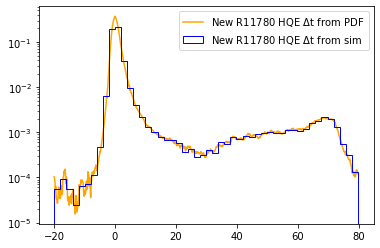

In [33]:
time_r11780_new=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r11780_new=[1.0295684447093295e-05, 1.0005440907763509e-05, 8.65327990079723e-06, 7.441897347036223e-06, 5.404665894004633e-06, 6.443874493762297e-06, 4.903564204108379e-06, 3.5132191231600398e-06, 3.294005009220272e-06, 3.1786166611446467e-06, 2.799724330627926e-06, 2.6679249855892243e-06, 3.21449964055082e-06, 3.715800513208914e-06, 4.328261609614684e-06, 6.09486088899795e-06, 4.901672621496921e-06, 5.259172940952912e-06, 3.5344023481749983e-06, 4.887356100583378e-06, 3.4618788605771803e-06, 3.853581878058707e-06, 5.048735214742655e-06, 6.581855447611584e-06, 6.5272865335183955e-06, 4.135928510389289e-06, 5.253748615501695e-06, 4.6076272164142e-06, 7.918031230549513e-06, 9.34394805634685e-06, 1.0096191420026353e-05, 1.0852666567767798e-05, 1.2368688979669555e-05, 1.3893928741376345e-05, 1.2380788648659465e-05, 1.4620893647886758e-05, 1.526559603106977e-05, 1.2712003088322962e-05, 7.397038607992858e-06, 9.150034846495927e-06, 1.015385991806525e-05, 8.442902780685074e-06, 9.110365337774294e-06, 6.838232565119896e-06, 3.5263663670482566e-06, 2.9951818675254934e-06, 3.1931534657791452e-06, 3.7376736883129813e-06, 3.2399160960532683e-06, 2.4344580788621037e-06, 2.9933066094549612e-06, 3.0516725273758598e-06, 2.7660795172437776e-06, 3.758201319616742e-06, 2.810617084464792e-06, 4.000545936010113e-06, 3.273368941444445e-06, 2.6111487512449473e-06, 3.0112396276916786e-06, 4.4649561887416285e-06, 3.751120628190998e-06, 4.532258252268691e-06, 4.2143174467142694e-06, 5.4814886827922835e-06, 3.926432941405721e-06, 2.633936394319577e-06, 2.617285239562471e-06, 2.257465984805855e-06, 1.753816019963473e-06, 1.5549694868391568e-06, 2.0999112220531503e-06, 3.1363209754570686e-06, 3.973297377115321e-06, 2.167060881289012e-06, 1.7059561653639796e-06, 2.905770223494519e-06, 1.8543121196166165e-06, 2.0693259276812266e-06, 2.3580721714093425e-06, 2.4374881319121734e-06, 3.5908391954239277e-06, 4.373947471046223e-06, 6.915557436775004e-06, 6.820081189698134e-06, 6.403755228441657e-06, 6.898238476305113e-06, 5.831854724014659e-06, 7.4835488178842575e-06, 8.818888391030883e-06, 7.568565459258973e-06, 7.952775003575763e-06, 8.241631236638577e-06, 8.768824499289148e-06, 8.185346507561363e-06, 8.301990687889902e-06, 7.555718823797467e-06, 6.133666937082864e-06, 4.3430828862890686e-06, 3.84229464701845e-06, 5.039859470107751e-06, 5.212331297630412e-06, 4.790258102271616e-06, 4.16924815995983e-06, 4.686344348868957e-06, 4.698211359775661e-06, 6.698865903371774e-06, 8.238101248437594e-06, 5.4489274996347025e-06, 6.853016892452455e-06, 8.914396494927348e-06, 9.331032627884846e-06, 1.3451406916096793e-05, 1.2962003509274725e-05, 1.1884430132447833e-05, 9.36606579928967e-06, 6.409839789599644e-06, 9.897204165247143e-06, 9.669092971861546e-06, 6.618115296334976e-06, 5.004002604747235e-06, 3.569951070542144e-06, 5.597143762221025e-06, 7.234258916285997e-06, 8.671285739054044e-06, 1.1753178006555696e-05, 1.314930669663985e-05, 1.2733548770890934e-05, 1.2247287820019428e-05, 1.0744581679390328e-05, 1.201492490568689e-05, 1.395794965414907e-05, 1.381491207538806e-05, 1.2199244739286486e-05, 1.4258306985505634e-05, 1.571224386324529e-05, 1.668318043257229e-05, 1.6344494786919483e-05, 1.8835364617843793e-05, 1.872650281335428e-05, 1.6294249368576617e-05, 1.4487816968080951e-05, 1.391732821333099e-05, 1.5606507480773956e-05, 1.8274136519430175e-05, 2.038763427793053e-05, 2.197636664387237e-05, 2.2851474072192854e-05, 2.749181269855793e-05, 3.045121594948319e-05, 3.257416848789003e-05, 3.54941403313163e-05, 3.829230017782082e-05, 3.693207376644704e-05, 4.171043711756434e-05, 4.6809427490494974e-05, 5.513511624699964e-05, 6.15606044389149e-05, 6.569361151431302e-05, 7.287232772542639e-05, 8.12307555435533e-05, 9.317023500600943e-05, 0.00010786929816261864, 0.00011681387705140625, 0.00013335137344021794, 0.0001488401329978488, 0.0001788869036980292, 0.00020017721288094232, 0.0002493622552244907, 0.0002812274923593637, 0.0003321731924638538, 0.00038305477490188736, 0.00043364559080201763, 0.00061216882327711, 0.0005685497502140493, 0.0007663723805679636, 0.0008305919227963108, 0.0009936400044677361, 0.0013123890924693585, 0.0018313123126813401, 0.0021597352803580743, 0.0027292088748890266, 0.0035993802935663155, 0.004485706237896585, 0.005803001149150975, 0.0066508098476714605, 0.00839470306239773, 0.010094366582552104, 0.011946732825196824, 0.013895049788605174, 0.016482275351128693, 0.01928113326725369, 0.021394623635890557, 0.024120892634648505, 0.025776195560703877, 0.028858547820602664, 0.030542482268325226, 0.032323606237921965, 0.03373077758750934, 0.03489313544381186, 0.035254310184818866, 0.03728929105023191, 0.035198283912241335, 0.03442089704635543, 0.03355822470960931, 0.031943387197526305, 0.030969060494370475, 0.02864720216272073, 0.02709793597424466, 0.02508076884924828, 0.023179592278063488, 0.02090652896680316, 0.019386674917052926, 0.017433359455840274, 0.01546565684581895, 0.014158265273104993, 0.013205643019832757, 0.011336404069341338, 0.010136403933358348, 0.009299070966087302, 0.008370487551369233, 0.007686043675537663, 0.0070739938679798605, 0.006368270933233291, 0.006023092000662399, 0.005487869682277481, 0.00491224616068499, 0.004480056862411577, 0.004262695107362419, 0.003691312165764296, 0.0035850393628120932, 0.0031705927035955333, 0.002998817316421892, 0.0027002399747006627, 0.0026188560991988927, 0.002271517023309151, 0.00228561463464955, 0.0020504843991173763, 0.00183669940065503, 0.0016627473125671879, 0.0016188201469291424, 0.001593062108179857, 0.001518307912577964, 0.001436610156743552, 0.001278755954843384, 0.0012754106016485084, 0.001033042978431834, 0.0010542504475632485, 0.0011054529566425215, 0.0010191665562822051, 0.0008544866747440287, 0.0008670137743029359, 0.000806942081380718, 0.0007626290021626953, 0.0007628135543434405, 0.0007476207612327573, 0.000679105925673468, 0.0006619418270850002, 0.0006192494083722822, 0.0006072531255228793, 0.0005719594652266217, 0.0005374011040982057, 0.0005181760392598602, 0.0004898525158267313, 0.0004689351027277224, 0.00045104166785190383, 0.0004254956389073612, 0.0004074638435295014, 0.00039988625260365383, 0.00038738048950932624, 0.00036779947366801565, 0.0003512248287417337, 0.0003454032156955487, 0.0003343307836793483, 0.0003318797854585575, 0.0003211904434778334, 0.0003127687853146277, 0.00030022325633039546, 0.000291780215964766, 0.0002860852613332197, 0.0002792354938229964, 0.0002714482858172281, 0.0002667944428848489, 0.000262826640794029, 0.00025855999577974, 0.0002489586803979868, 0.0002438548391478414, 0.00023823581452407321, 0.00023222080181940845, 0.00021971447967118426, 0.00021735468395734495, 0.0002086888429846281, 0.00020734953120225401, 0.00020461356587873488, 0.00019879332819962956, 0.00019118059057984338, 0.00018734298537381603, 0.00017949267229355352, 0.000172329793778201, 0.00016234035991460305, 0.0001558247253349851, 0.00015549951764123234, 0.00015210357795270864, 0.00014603205379658986, 0.00014800190952355183, 0.00014501547231854617, 0.00014266626233957677, 0.000137835182603892, 0.00013477253862176429, 0.0001356240021524959, 0.00013603379975117143, 0.00013233365270759297, 0.00012943351203582436, 0.00012967285433783667, 0.0001326500931430214, 0.00013237198874337545, 0.00012944274855362396, 0.00012586599392130273, 0.0001229452778308596, 0.00011883289566057239, 0.00011602436334606778, 0.00011437736547457705, 0.00011336851055464045, 0.00011340708460665497, 0.00011182178312811005, 0.00010983471054468771, 0.00010890716339286579, 0.00010593539068765562, 0.00010327927447431433, 9.99470910215919e-05, 9.786339547061597e-05, 9.71207055586325e-05, 9.714882829523181e-05, 9.785467965629263e-05, 9.521842016849945e-05, 9.450029108477784e-05, 9.476865518474357e-05, 9.297450860260484e-05, 9.265542919029356e-05, 8.913727500650014e-05, 8.790961449348519e-05, 8.91142176713923e-05, 9.029202484565535e-05, 8.886457678286104e-05, 8.724644453292875e-05, 8.488621265018751e-05, 8.372621452583968e-05, 8.557282928224732e-05, 8.189643951539529e-05, 8.314254152805186e-05, 8.378475268086448e-05, 8.204777380749084e-05, 7.982989915236496e-05, 7.85142851812159e-05, 7.725979220455718e-05, 7.814671628328278e-05, 7.502409421277535e-05, 7.374234557065502e-05, 7.669216598768794e-05, 7.30815352209129e-05, 7.627024699414459e-05, 7.810332080744397e-05, 7.596082704578677e-05, 7.593840396561186e-05, 7.271538311799723e-05, 7.212572769546114e-05, 7.157143163397397e-05, 7.223274783693506e-05, 7.380075971413872e-05, 7.243149362579647e-05, 7.007582131622192e-05, 7.227407357654802e-05, 7.21867166168731e-05, 6.839650613043415e-05, 7.220172226668396e-05, 7.124799682931492e-05, 7.036930970648354e-05, 7.019035242570281e-05, 7.026615789724424e-05, 6.907198304863249e-05, 6.92032796538679e-05, 7.492391195330782e-05, 7.30569344102548e-05, 6.785086968213098e-05, 6.883024899795668e-05, 6.971105532199378e-05, 6.83073922800403e-05, 6.586512913663565e-05, 6.708802701782047e-05, 6.639983667848822e-05, 6.55653949559028e-05, 6.220247563446425e-05, 6.343701803476447e-05, 6.0934541131269015e-05, 5.8050885585718854e-05, 6.0955705174638987e-05, 5.634490222196987e-05, 5.8915109518706354e-05, 6.143292318904363e-05, 6.007323459646633e-05, 5.845052175061893e-05, 5.5392548064087346e-05, 5.50621874604362e-05, 5.1951080029557184e-05, 5.026524099239315e-05, 5.190572128541998e-05, 5.308644730121393e-05, 5.148937145812825e-05, 5.424278981662301e-05, 5.2888477354912325e-05, 5.2581569655522837e-05, 5.237940260848517e-05, 4.995598803472239e-05, 4.8753215268696375e-05, 4.6314673089401324e-05, 4.4775152971517964e-05, 4.8882366432738065e-05, 5.088894730167661e-05, 5.014942814430727e-05, 5.3687821150623914e-05, 5.3580487782981e-05, 5.074888544333756e-05, 4.840641608569634e-05, 4.755082286214929e-05, 5.010278835148492e-05, 4.832229098852607e-05, 4.4866334445469766e-05, 4.401908079910979e-05, 4.403063661356394e-05, 4.5607651996355254e-05, 4.8733473734901394e-05, 4.5053391261111926e-05, 3.9014979377454924e-05, 4.1000141258467814e-05, 4.2785623836882405e-05, 4.4630844179281937e-05, 4.3569443806020236e-05, 4.4375640920786707e-05, 4.338174032512024e-05, 4.905775230440383e-05, 4.808233750193917e-05, 4.8790891381357803e-05, 4.82480507969496e-05, 4.7803158652199454e-05, 4.6137029015396255e-05, 4.510963927236201e-05, 4.8524094791706526e-05, 4.9434361625753425e-05, 4.643079145868095e-05, 4.3243907791602915e-05, 4.1089413963143935e-05, 4.125884846716863e-05, 4.139554629940896e-05, 4.139904917228124e-05, 3.613608065078061e-05, 3.857656471340271e-05, 3.8979340450720635e-05, 3.916905131198848e-05, 4.138328178330615e-05, 4.069711177604604e-05, 3.822489579005155e-05, 3.479108473526903e-05, 3.511520141206699e-05, 3.726642447439627e-05, 3.600700510746697e-05, 3.481561520847066e-05, 3.63519028200847e-05, 3.432294482209667e-05, 3.535881292647462e-05, 3.688590275376194e-05, 3.51059107856019e-05, 3.51423621065333e-05, 3.507287242691777e-05, 3.695511390309739e-05, 3.594086729329412e-05, 3.493146463057957e-05, 3.44664625609289e-05, 3.4255113604128034e-05, 3.3136408440220145e-05, 3.35669609476189e-05, 3.4317980844507906e-05, 3.598774009505853e-05, 3.7155666875664e-05, 3.739049533013139e-05, 3.4253298067473324e-05, 3.283492690315984e-05, 3.424835520006621e-05, 3.347158915731413e-05, 3.348385407087417e-05, 3.407639644259028e-05, 3.31586309140771e-05, 3.4859166311666505e-05, 3.440595805129035e-05, 3.2640786470826804e-05, 3.0683558024832415e-05, 2.9560677207991448e-05, 2.7679973482370026e-05, 2.859622119266865e-05, 2.9800100335844748e-05, 2.8338584199523147e-05, 3.0266582677949582e-05, 3.4059829112458404e-05, 3.3128041570283245e-05, 3.277664517857922e-05, 3.549617240000599e-05, 4.006027486235433e-05, 3.719851715308663e-05, 3.510437900842666e-05, 3.613498412197748e-05, 3.6403827949280245e-05, 3.9181854087482585e-05, 3.866389599564239e-05, 3.7980216373884764e-05, 3.9308207765356864e-05, 4.215815104823582e-05, 4.2339614336835007e-05, 3.834998157331614e-05, 3.8023948529413154e-05, 3.960509602949862e-05, 3.909592953700069e-05, 3.799327653252414e-05, 3.6417337059668744e-05, 3.734580880868878e-05, 3.7130795445160036e-05, 3.847810273478151e-05, 3.666156632026827e-05, 3.867244013190256e-05, 3.872919523440786e-05, 3.864760209896013e-05, 4.038278112295342e-05, 4.1185381032849064e-05, 4.402527922543719e-05, 4.555429633264802e-05, 4.761609118626598e-05, 4.7580849955571164e-05, 4.702887085401968e-05, 4.727842611757576e-05, 4.893313431308625e-05, 5.327742381288039e-05, 5.257211805705693e-05, 5.365880650876562e-05, 5.0464741423199504e-05, 5.08129624260111e-05, 5.331550420792941e-05, 5.301374763715853e-05, 5.069844222212535e-05, 5.0642031285114765e-05, 5.156554842488999e-05, 4.936444248365318e-05, 5.0239867599199546e-05, 4.983075438303083e-05, 5.009240841519433e-05, 5.0579922203164715e-05, 4.846803749211823e-05, 4.8599021525469436e-05, 5.1749602850044816e-05, 5.373646232988456e-05, 5.5378490113794714e-05, 5.34753508654469e-05, 5.520122171603769e-05, 5.7524950946091904e-05, 5.882728325684774e-05, 5.885029985522638e-05, 5.886898101022332e-05, 6.212960557689905e-05, 6.218222648516607e-05, 6.274273574350066e-05, 6.090631154374879e-05, 6.252811884520677e-05, 6.045644999372075e-05, 5.956262770364221e-05, 5.910324155047353e-05, 6.097986585776325e-05, 6.170139159892403e-05, 6.0394759448775804e-05, 6.156227952542218e-05, 6.181814081185592e-05, 5.807088178108807e-05, 5.907500292210135e-05, 5.8674287654238185e-05, 6.234912246810092e-05, 6.15817368367528e-05, 6.534791159842073e-05, 7.039252066237847e-05, 7.434981986037253e-05, 7.470438601414924e-05, 7.77660571605731e-05, 7.765384028193527e-05, 8.024362992945461e-05, 8.20212196468596e-05, 7.914324284644376e-05, 7.800177086652902e-05, 7.789561650070171e-05, 7.675682081568389e-05, 7.985319627800062e-05, 7.833355751448919e-05, 7.655462325553317e-05, 7.263569240066028e-05, 7.024507774227554e-05, 6.904603091981901e-05, 7.246045055318301e-05, 7.14176889269396e-05, 7.049903485980415e-05, 7.11629257220193e-05, 6.915710495762986e-05, 6.890661534700082e-05, 6.961682066326608e-05, 7.305223501265868e-05, 7.274402781902635e-05, 7.054880010443024e-05, 7.183149680035252e-05, 7.142222625660574e-05, 7.244023617931332e-05, 7.509587196569831e-05, 7.492619226768889e-05, 7.128278517733965e-05, 7.075001312408676e-05, 7.097334592607105e-05, 6.866670152227415e-05, 6.786822539579335e-05, 6.922045775970904e-05, 7.144608690130533e-05, 6.836706857657366e-05, 6.838274706985776e-05, 6.842106553933419e-05, 7.136090258381621e-05, 7.441628118342778e-05, 7.657838826326268e-05, 7.505754497734537e-05, 7.594570970365265e-05, 7.904426266864112e-05, 8.285337764090843e-05, 8.157730058348576e-05, 8.356015559094808e-05, 8.677553887354755e-05, 8.894035239504094e-05, 9.043443379927884e-05, 9.029095901780635e-05, 9.458166983986173e-05, 9.366486448154963e-05, 8.923231558700281e-05, 8.97381081622535e-05, 9.058627017587564e-05, 9.211258702150896e-05, 8.955153541444302e-05, 8.567820460126451e-05, 8.217811219099473e-05, 8.161118222534843e-05, 8.227620930470133e-05, 8.215464027506788e-05, 8.210375566681261e-05, 8.253695022915126e-05, 8.275270367517773e-05, 8.245033389627381e-05, 8.689189946486115e-05, 8.831449128661967e-05, 8.802440834150232e-05, 8.825137988653052e-05, 8.701302659459706e-05, 8.6782254547305e-05, 8.477675850428625e-05, 8.447912375025099e-05, 8.64949239428242e-05, 8.623159819030071e-05, 8.486028427498846e-05, 8.246658376856957e-05, 8.171019936685999e-05, 8.085410856011312e-05, 8.03841917818463e-05, 7.765670904790346e-05, 7.521116758120798e-05, 7.389982054161543e-05, 7.294221931725032e-05, 7.451595074326649e-05, 7.59413410766022e-05, 7.847210680672581e-05, 7.93083378704544e-05, 7.735651382730668e-05, 7.869204353231082e-05, 8.120029076521256e-05, 8.591490563335564e-05, 8.601974795025118e-05, 8.645959184361374e-05, 8.980747909916217e-05, 9.441515946859208e-05, 9.359735357224272e-05, 9.179541534223265e-05, 9.303249046912033e-05, 9.189086561665528e-05, 9.384014847069923e-05, 9.679519001358467e-05, 0.00010098437645339788, 0.00010236822621604807, 9.969352892093844e-05, 0.00010005977911747048, 9.772187292349333e-05, 9.595237193973626e-05, 9.8476347399964e-05, 9.471146578907464e-05, 9.185510937409165e-05, 9.597685121166543e-05, 9.794915344759183e-05, 9.659948346861185e-05, 0.00010156829543804522, 9.946486062179083e-05, 9.639056318599327e-05, 9.415285635032713e-05, 9.701442108506179e-05, 0.00010000422125359934, 0.00010113700105439567, 0.00010545292324573219, 0.00010718574522549047, 0.00010737546946488051, 0.00011025484423343468, 0.00011075106830558803, 0.00010551062956877718, 0.00010551954987117252, 0.0001041856264183308, 9.955121430110922e-05, 0.00010071838292133839, 0.00010103936019358486, 0.0001028479749902566, 0.00010291409968458964, 0.00010345629549966615, 0.00010208545269705516, 9.853755303303913e-05, 9.608928228302372e-05, 9.652606024972317e-05, 9.454587955841094e-05, 9.937792386475577e-05, 9.911411411861365e-05, 9.839150985854219e-05, 0.00010098642613756882, 0.00010534556844206519, 0.000106612042553214, 0.00010672151929912406, 0.00010199025505996577, 0.00010048414233344227, 9.802211066432236e-05, 9.985704562093649e-05, 0.00010165691123846175, 0.0001040466776604405, 0.00010030633174840111, 9.873822923255364e-05, 9.639193995341106e-05, 9.44317406241672e-05, 9.627193895112537e-05, 9.264595866985339e-05, 9.070506406083107e-05, 9.079784841234478e-05, 9.27421675499298e-05, 9.319735639642697e-05, 9.411073285466e-05, 9.469289124627294e-05, 9.721862698164221e-05, 9.56071894833343e-05, 9.674198392401635e-05, 9.737572096365383e-05, 9.995833357171823e-05, 0.00010113308640319555, 0.00010796340247476899, 0.00010711241642129872, 0.000110000313767176, 0.00011031970620653396, 0.00011313852690968423, 0.00011244611843457034, 0.00011403588231050921, 0.00011509955864545881, 0.0001118886678173575, 0.0001070582601206471, 0.00010662848101850362, 0.00010672820238897713, 0.00011277797937514666, 0.00011218764878663629, 0.00011036138708759349, 0.00010972962386409948, 0.00011294370026026664, 0.0001141866944269, 0.00011591301890818472, 0.00011683669390242137, 0.00011881652308990208, 0.00011721637251101453, 0.00011460557810575701, 0.00011924559637160267, 0.00011911629439128364, 0.00012338507815720372, 0.00011915744831987069, 0.0001143317530472321, 0.0001148754522883465, 0.00011516201135014456, 0.00011325817027705039, 0.00011124453485891228, 0.0001110130843015486, 0.00011370611460831765, 0.00011500402996039076, 0.00011453320058972473, 0.00011699676725270077, 0.00011542015074478825, 0.00011541409780648274, 0.00011640692899026015, 0.000113496118231656, 0.0001158148882109782, 0.00011650815811745293, 0.00011417543494814152, 0.00011763314342939994, 0.0001176225264878387, 0.00011873325542675755, 0.00011763142361573682, 0.00011953688280701628, 0.00011710687872816367, 0.00011766481359663312, 0.00011470898672127152, 0.00011666347004787534, 0.0001171505655598603, 0.0001147270918432824, 0.0001111707490042372, 0.00011428647887311436, 0.00011643651506400931, 0.0001220212080776949, 0.000119775778570283, 0.00011710530499208925, 0.00011903227991375287, 0.0001204546451879465, 0.0001158938735305664, 0.00011507223259459804, 0.0001160570713693038, 0.00012257029318900526, 0.00012708081352781782, 0.00012694093417613055, 0.0001281640043486222, 0.00013226315122128132, 0.0001305158276726239, 0.0001314009862844891, 0.00013046466435083558, 0.0001294458128152952, 0.00013512043463838116, 0.00013495296594484075, 0.0001327686258610582, 0.00013694414994102217, 0.00014135903991119994, 0.00014202532953988908, 0.00013938091060693977, 0.00014237188545962012, 0.00014146511148441395, 0.00014969119908479268, 0.00015088931199096166, 0.00015810338198760985, 0.00015628286029811792, 0.00015713917736107105, 0.00016201887958723588, 0.0001586252999758476, 0.00015964176945500026, 0.00016218761895813588, 0.0001646873037563787, 0.00016705762686690338, 0.00017211222108947735, 0.0001775203473919152, 0.0001746269389148775, 0.00017884870280997082, 0.00017633376473473163, 0.000179815828102603, 0.0001749951885194672, 0.00017647251609477624, 0.00017972662355697903, 0.00017958016430123243, 0.0001816687611206764, 0.00018430521793135648, 0.00018824406769203433, 0.00018904568164172022, 0.00019051029674607483, 0.00018700927631912963, 0.00018730319780053308, 0.00018846826495203024, 0.00018972490506028548, 0.00019442982101211778, 0.00019492612969142781, 0.00019656062477824116, 0.0002029897366820485, 0.00020301553798149726, 0.00020665281239205119, 0.00020587417884395087, 0.00020563163179892273, 0.00020975970050012954, 0.00020812718887911301, 0.00020643327769968408, 0.0002090093831883141, 0.00020998181132650997, 0.0002112197197656527, 0.00021012535711648113, 0.00020675443337073203, 0.00020656414524502305, 0.00020644473478323222, 0.0002034521908039343, 0.0002047793864930215, 0.00020114993118674788, 0.00020629385408661526, 0.00020496661978412897, 0.0002013131627042182, 0.00020070368510141244, 0.00019954149569692043, 0.00020163946903058093, 0.00019681377364108468, 0.00019653394679243762, 0.00019614778137348526, 0.00019489315828921804, 0.00019477400914341938, 0.0001954577870036956, 0.00019634320445777132, 0.00019415227118242375, 0.00019697797235900916, 0.00019530474887697493, 0.00019571296638240464, 0.00019557049728878586, 0.00019596794321073113, 0.00019230548289032818, 0.00018577167454295556, 0.00018387206789941563, 0.00018100340215250038, 0.0001776177016172919, 0.00017940371739900746, 0.00017747078602310107, 0.00017396992712390906, 0.00016878209412329938, 0.00016308115505770282, 0.00015545472819648493, 0.0001506377880197791, 0.0001432326834146784, 0.0001338577751329606, 0.00012866798301345534, 0.0001226820991775426, 0.00011977528268627627, 0.00011389869394011339, 0.00011015592029893318, 0.00010688495104042683, 9.604433471211392e-05, 8.859346152139682e-05, 8.386986298233619e-05, 8.175691530983866e-05, 7.810953221311508e-05, 7.255261927819649e-05, 6.831103172801323e-05, 6.419559838982042e-05, 6.458124460443593e-05, 5.876677262887975e-05, 5.931344172155612e-05, 5.4801718691610645e-05, 5.213914690998958e-05, 4.8859585920453913e-05, 4.68785196699893e-05, 4.4459521597269766e-05, 4.1468404948313065e-05, 3.964146004450374e-05, 3.74883882839406e-05, 3.6934922774949926e-05, 3.707741116681248e-05, 3.6740857012939345e-05, 3.834808224028327e-05, 3.210319083428587e-05, 3.3921257392395845e-05, 3.304725521822964e-05, 3.156075116196825e-05, 3.056462144972612e-05, 3.097475114576892e-05, 3.127668254242425e-05, 3.210865424956522e-05, 2.733968787547446e-05, 2.6799892619334752e-05, 2.623586528141137e-05, 2.5091061653561265e-05, 2.4140159626813652e-05, 2.4419329015951034e-05, 2.4780901456630418e-05, 2.5131234006758897e-05, 2.15505448096029e-05, 1.966846185782875e-05, 1.972654364416503e-05, 1.8667456827550712e-05, 1.5226816791388151e-05, 1.4948798475851471e-05, 1.2592839413822262e-05, 1.4394116388937857e-05, 1.3237349691170603e-05, 1.3229171428523078e-05, 1.2653799129508857e-05, 1.0992253119536559e-05, 1.2344582906580784e-05, 1.3200669471642057e-05, 1.306141595441489e-05, 1.1758588158054986e-05, 1.0191590091418957e-05, 1.0401600185447324e-05, 1.2829463825831039e-05, 1.1992884108038922e-05, 1.4528880172468398e-05, 1.3591305678020723e-05, 1.4472262688153396e-05, 1.3956087909253395e-05, 1.2365387754018916e-05, 1.241354171149622e-05, 1.2538411099923918e-05, 1.1419161096999913e-05]
for i in range(len(prob_r11780_new)):
    prob_r11780_new[i]=prob_r11780_new[i]/0.1
    
plt.plot(time_r11780_new,prob_r11780_new,label='New R11780 HQE $\Delta$t from PDF',color='orange')



sum=0
for i in prob_r11780_new:
    sum+=i
print(sum)


plt.hist(r11780_deltat_new,bins=50,density=True,histtype='step',color='blue',label='New R11780 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
#plt.ylim(1e-3,3.5e-1)

9.999999999999988


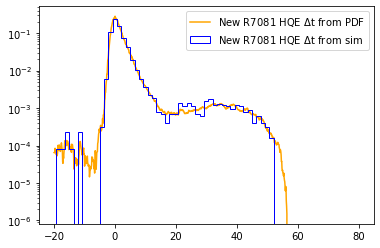

In [34]:
time_r7081_new=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r7081_new=[6.477252353059505e-06, 6.348617582325032e-06, 6.793208358336695e-06, 8.44573284275054e-06, 7.382786436570142e-06, 7.955318926776582e-06, 6.355868820653126e-06, 5.748041570434093e-06, 5.613774703602447e-06, 7.0433204104966765e-06, 5.338496618848524e-06, 6.07577888957862e-06, 7.407394646812893e-06, 1.0165281338374648e-05, 8.517348788952183e-06, 7.6250279706393535e-06, 9.988751418831212e-06, 1.0342222024553033e-05, 7.707356384009844e-06, 7.807549391069272e-06, 6.935248571117256e-06, 6.99832632406247e-06, 9.024670219333584e-06, 1.0338362850007837e-05, 1.1802476948641399e-05, 9.740157484353449e-06, 8.149093718351616e-06, 7.249272491804335e-06, 3.7100734070217578e-06, 3.344191172921612e-06, 5.4400090871084e-06, 4.536837812944318e-06, 6.038691908504896e-06, 8.615804402877488e-06, 1.1356011595059825e-05, 1.3344233023240597e-05, 8.836419225377086e-06, 1.0247468501179782e-05, 1.1996726790247485e-05, 9.845620090289486e-06, 1.3600723277674982e-05, 1.3098484401589946e-05, 1.1035728360102696e-05, 1.0391834164773625e-05, 1.3201887364337455e-05, 1.088251368574816e-05, 1.1415049268691815e-05, 9.468749341407572e-06, 7.810262333579184e-06, 8.296090425972567e-06, 1.0993723698260635e-05, 1.04566300433422e-05, 8.99822575535344e-06, 9.100116636486067e-06, 9.100116636486067e-06, 7.215945731682585e-06, 6.898716300973011e-06, 6.59304365757513e-06, 1.0905954197436539e-05, 9.19622043504275e-06, 1.0548956744737937e-05, 8.949687433396907e-06, 8.24830029649723e-06, 8.020861363902474e-06, 5.373240203429821e-06, 2.3546801826207684e-06, 2.822932628875495e-06, 4.014060163739129e-06, 3.3024110957898197e-06, 4.6922595031233815e-06, 4.0739835597588895e-06, 4.345262725099279e-06, 4.604091002580034e-06, 4.034574164038612e-06, 2.882210524957142e-06, 3.593046166477793e-06, 3.472267616473833e-06, 4.261252493979605e-06, 4.005514792502678e-06, 4.178878478295117e-06, 3.1072789057977084e-06, 4.64914997514589e-06, 5.632170595570784e-06, 1.0907077497495723e-05, 1.103768740156592e-05, 1.2863675822466214e-05, 1.2536384275912098e-05, 1.0562880600707413e-05, 9.441342905102755e-06, 7.953288445303753e-06, 7.742909992558101e-06, 5.762921182618292e-06, 5.614557720048108e-06, 5.564450486108529e-06, 6.643280141727558e-06, 8.019795712901486e-06, 7.91347350611662e-06, 8.571239779441892e-06, 5.92792779728306e-06, 6.013324720245528e-06, 2.8245087279734867e-06, 3.496324936184182e-06, 5.3110622676820965e-06, 4.197945396530716e-06, 4.197945396530716e-06, 3.3887577558853254e-06, 3.305767758596298e-06, 3.5255274019291593e-06, 4.073457372492362e-06, 5.229784233742628e-06, 3.5680758081095083e-06, 3.2692920581045298e-06, 2.8318373071267556e-06, 2.9422309939909846e-06, 3.059651151583992e-06, 2.6525153221805797e-06, 1.4575756825156035e-06, 1.77369701905894e-06, 2.2416418800770454e-06, 2.2574801650667563e-06, 2.7652830137654752e-06, 2.407668961850338e-06, 2.688130448445817e-06, 3.0388272008751443e-06, 4.980502534780044e-06, 4.878611653647417e-06, 4.751952202153761e-06, 3.908826186196184e-06, 3.727525061243221e-06, 4.075489723567582e-06, 3.620975733263452e-06, 2.3963256902529304e-06, 2.818390760848222e-06, 1.8399208188161758e-06, 3.377313111092207e-06, 7.294546435135991e-06, 5.5367695281660495e-06, 3.14313582972681e-06, 2.336931381213363e-06, 4.156828046189905e-06, 6.49936962413608e-06, 6.777244135424595e-06, 6.842364526305223e-06, 1.1299002785965072e-05, 1.2275441666754815e-05, 1.6362823121151924e-05, 2.025601996763975e-05, 2.2134992058147306e-05, 2.7389792364820548e-05, 2.4623601341858556e-05, 2.3311762681932462e-05, 2.6495651912310416e-05, 3.3466210126011786e-05, 3.472205504093035e-05, 2.4416779960687522e-05, 2.5479846122285122e-05, 2.6323836099870723e-05, 3.0610242718651045e-05, 3.495719242353376e-05, 5.2383961205803506e-05, 3.9114488227054093e-05, 5.5618535743830025e-05, 6.672899821509145e-05, 6.055986611114093e-05, 8.833096993116168e-05, 9.676346338052142e-05, 0.0001624077593344047, 0.00017672408146613143, 0.0002563384024808323, 0.00026161545951266894, 0.00039831872725493503, 0.0004962114009045038, 0.0005564863849491585, 0.0008003118789554132, 0.0008033189673788328, 0.0011837382011470974, 0.001890905224006235, 0.002029366463701135, 0.002453399046279294, 0.0032752451756425573, 0.0038387087140148643, 0.0048380215591406345, 0.00568261225167211, 0.007058004326357847, 0.008258529967669926, 0.009164552678874028, 0.010958816258785456, 0.01268225388204542, 0.014348770172324662, 0.015309033456210095, 0.017138284542750064, 0.018710423724420593, 0.020195912701441717, 0.022855474578211746, 0.022842344534205833, 0.024060223767057565, 0.024912232280932763, 0.025735562267167205, 0.025376363152244532, 0.025322101794256032, 0.028208370641178666, 0.02608952182185907, 0.02564608797624278, 0.024463585557082456, 0.02428983822437703, 0.02362785412672406, 0.022900526339732163, 0.021840507909702184, 0.021928746629491458, 0.020484753248514457, 0.018387075461867047, 0.017717949674760192, 0.01706733638692825, 0.016176162763433827, 0.014707768432331247, 0.01445287308047975, 0.01380731386908583, 0.013053771294096147, 0.01225551476867186, 0.011455242225984708, 0.011011543642583228, 0.010841068056190504, 0.009561660107325409, 0.009864840966106328, 0.008741885295974347, 0.0084860090367294, 0.00789848902833906, 0.007463935779181938, 0.007143271189678254, 0.006768633238913754, 0.006703523712103599, 0.0064724050739282425, 0.006164580841528996, 0.00557948644874829, 0.005148027430447808, 0.005261774944453934, 0.005175431684414245, 0.004862424783870712, 0.00438784430889803, 0.004504114485178098, 0.004247688558578162, 0.0041189345231991996, 0.0039657065301697434, 0.0037736481108464476, 0.0036350431808393107, 0.0035367400257684135, 0.0030195469562738007, 0.0029262891370771525, 0.0029287360446725334, 0.0028654758614627598, 0.002838066254188683, 0.0025974829368660655, 0.0025766072336376534, 0.002340600887373969, 0.0024098639927567413, 0.002218985820421655, 0.002276703258125501, 0.001940988879697367, 0.002040502252021911, 0.0019350765417689329, 0.0018190797028113405, 0.0017045532610494955, 0.0015026806153508186, 0.0014740380080867036, 0.0014712320634946703, 0.0014205064455623763, 0.0013096317622081988, 0.0012462770938811518, 0.0012118113331760273, 0.0011661528676801501, 0.0011101733953443318, 0.0010711796027830724, 0.0010067407064930029, 0.0009753542203596307, 0.0009560190299415746, 0.0009047803434667237, 0.0008449278275985761, 0.0008221642988481733, 0.000778540408231575, 0.0007541814728860104, 0.0007108591810872251, 0.0007054564639182394, 0.0006645166209823804, 0.0006078298553505742, 0.0005811976716018032, 0.0005859219086539408, 0.000561006050987465, 0.0005581983379608225, 0.0005379638927676469, 0.0005122682496928319, 0.00048779867017627364, 0.0004688272333678796, 0.0004537683918865493, 0.0004422161756584205, 0.0004383689063658276, 0.0004236810239972733, 0.00041224260206387705, 0.00040362374851460716, 0.00039655277112904267, 0.000393109644172482, 0.00038048099460560126, 0.00036419654439559784, 0.00034827108422241896, 0.0003384685312024417, 0.0003248939370837163, 0.0003171993051704302, 0.00031038704049630306, 0.00029875808506133134, 0.0002900935213478468, 0.00027807141610541826, 0.00027696773303733177, 0.0002690632281420844, 0.0002636353441738056, 0.0002521842680140038, 0.0002447730333021577, 0.00023289951512631515, 0.00022315952202765904, 0.00021945676413842802, 0.00021359557709954138, 0.00020969617515846715, 0.00020657110643956174, 0.0002015855277841609, 0.00019823512145606193, 0.00019805071398388703, 0.0001909816761090557, 0.0001795409848899005, 0.00017528636488417992, 0.00016718690099322035, 0.0001632927516895769, 0.00015165688911824096, 0.00015464694297105019, 0.00015583847247299556, 0.0001574387822086679, 0.0001506847684021034, 0.00014732977147944727, 0.00013892469662889822, 0.00013246436396736276, 0.00013011573046332382, 0.00011878678894217736, 0.00011312114170140482, 0.00011629795982084147, 0.0001092743461467929, 0.00010866349767723037, 0.00010380823598048509, 0.00010407348619034705, 9.69192082908301e-05, 9.154938528244638e-05, 8.875955217424289e-05, 8.715484656388768e-05, 8.723973034796579e-05, 9.264329293718639e-05, 9.416601682760636e-05, 8.91853307431499e-05, 8.940190909326493e-05, 9.143648545747795e-05, 8.403197435399292e-05, 8.269491612392714e-05, 8.052249832100475e-05, 7.967946622713908e-05, 7.597311980791004e-05, 7.89618797146409e-05, 8.172969367915026e-05, 7.92349431144123e-05, 7.926997646358415e-05, 7.445179494993883e-05, 6.688918623739638e-05, 6.515742371786964e-05, 6.704547551971801e-05, 7.019536397269374e-05, 6.935529982528763e-05, 7.01594371124829e-05, 6.99735616698192e-05, 7.577125445386494e-05, 7.692482521234519e-05, 7.850755748704882e-05, 8.113311915955403e-05, 7.776822513929267e-05, 7.421263471773417e-05, 7.400438800006981e-05, 7.151005196280309e-05, 7.229826859854284e-05, 7.212031004830076e-05, 7.605475167023318e-05, 7.480126762663212e-05, 7.294397641782314e-05, 7.6585716185209e-05, 7.656605451607237e-05, 6.735173247735026e-05, 6.870047209733299e-05, 7.039475436592945e-05, 6.725352230890674e-05, 6.987064016748745e-05, 7.418140342943346e-05, 7.268340492180661e-05, 7.224971316484885e-05, 7.466940238153097e-05, 7.300151033372115e-05, 6.737705590738994e-05, 6.53404566801802e-05, 6.578095410031188e-05, 6.565554577737251e-05, 6.9986370811654e-05, 7.273326413142116e-05, 7.16206204080965e-05, 7.386808505386233e-05, 7.250260936778422e-05, 6.82321314617705e-05, 6.510759570805061e-05, 6.761984527442674e-05, 7.611942844050549e-05, 7.488790677320827e-05, 7.806164537008911e-05, 8.394816791587365e-05, 8.674158495339865e-05, 9.314650203596875e-05, 8.96647101732461e-05, 8.822849341902661e-05, 8.904328035961884e-05, 9.11365764880715e-05, 8.80266870821866e-05, 8.575158273722604e-05, 8.684075298001539e-05, 8.909408008670381e-05, 8.816098071446887e-05, 8.34996185513759e-05, 8.305285913112981e-05, 8.027654884682643e-05, 7.395182349051698e-05, 7.353271561106932e-05, 7.103736554104514e-05, 7.120338930238889e-05, 7.273331606178572e-05, 7.294835157543885e-05, 7.141707395780873e-05, 7.220488758085147e-05, 7.445796792373945e-05, 7.50439165150763e-05, 7.305505592184475e-05, 7.583803922498055e-05, 7.292345664518414e-05, 7.549217308075279e-05, 8.232064700395623e-05, 8.723419690253113e-05, 8.350713533177416e-05, 8.143424204788642e-05, 8.293301822506096e-05, 8.212688873606499e-05, 8.114220220197163e-05, 8.161573790109848e-05, 8.167504104169007e-05, 8.536310335749164e-05, 8.163479330851378e-05, 8.328252282724953e-05, 8.289613271812268e-05, 8.660930614690353e-05, 8.487122468446939e-05, 8.596424400759266e-05, 8.400360365855487e-05, 8.648109381310515e-05, 9.065230368304719e-05, 9.044828068631012e-05, 8.736461463315928e-05, 8.707561211389335e-05, 8.792716586349777e-05, 8.807424357449255e-05, 8.393169161990286e-05, 8.693749082506818e-05, 9.005487373930401e-05, 9.050356765527075e-05, 8.874614220334366e-05, 9.028395002046252e-05, 8.698956824216935e-05, 8.63101631558277e-05, 8.98920781064105e-05, 8.783082902820092e-05, 9.077204299910828e-05, 9.351404997291095e-05, 9.562432067302278e-05, 9.523251695779229e-05, 9.684892008223821e-05, 0.00010069582671761794, 9.92970158104125e-05, 9.500333033939436e-05, 9.714336867440601e-05, 0.00010094188488159741, 0.0001026303630228863, 0.00010661381725866346, 0.00010903268362323323, 0.00010637820364760345, 0.00010458301782465162, 0.00010447138557371503, 0.00010191533376960689, 0.00010135847295678145, 0.00010007544473899808, 9.80094794357839e-05, 9.74003643114023e-05, 9.865604092576091e-05, 9.950646084456134e-05, 9.913470127772073e-05, 9.547193760449286e-05, 9.956958064617061e-05, 9.978955953752869e-05, 9.961479314133948e-05, 0.00010440441407649823, 0.00010837323204461063, 0.00010579451554023834, 0.00010812226885825278, 0.00010874798669719398, 0.00011008849793836762, 0.00011638762694319909, 0.0001155184996224706, 0.00011381159065113927, 0.00011265056444083366, 0.00011330460913236994, 0.00011985274576965438, 0.00011533638666393311, 0.00011943880237875518, 0.00012276619632670585, 0.00012382909580606493, 0.00012483414935404857, 0.00012791500993048367, 0.00012861673567284585, 0.00012782639010811334, 0.0001281390386205841, 0.00012548557946504384, 0.0001228401381624208, 0.00012619786594221177, 0.00013016214030700502, 0.00012961116334923324, 0.00012403312468672485, 0.00012524529032390477, 0.00011953054053893467, 0.00012060564140384093, 0.00011442378448776194, 0.00011604136850016427, 0.00011662699970215009, 0.00011647263365542542, 0.00011733046716740322, 0.00011807247753037693, 0.00011734620563062575, 0.00012279209360652716, 0.00012330275317243386, 0.00011921195596537506, 0.00012571256725664294, 0.0001286756820112646, 0.00012484167786915842, 0.00013098270197096107, 0.00013065698409167197, 0.00013147769029435945, 0.00013114502381539203, 0.00012800321724894804, 0.00012587872642899002, 0.00012456445093026928, 0.00012303321548838008, 0.00012320486171679232, 0.00011921398109822118, 0.00011488782638857998, 0.00011813470402648493, 0.00010895429492724262, 0.00010758175607251623, 0.00010751100804153404, 0.00010087218039974295, 9.855791825394979e-05, 9.866041775600727e-05, 9.34806315267594e-05, 9.749714089358501e-05, 9.990384158068782e-05, 9.742603270217374e-05, 9.76790635825738e-05, 0.0001024627372853988, 0.00010482581059688244, 0.0001078978678033789, 0.0001023076674336255, 0.0001025050119555272, 0.0001041256165160317, 0.00011051853451426752, 0.00011595942842885615, 0.00011363235529010671, 0.00011498926967299806, 0.00012028466414010533, 0.00011917827092183271, 0.00011850498907971516, 0.00011874383987854071, 0.0001240153690110213, 0.00012059418535345172, 0.00012272780467957668, 0.00012080435725636138, 0.00012503522627418408, 0.0001267687190873225, 0.00012567053014427636, 0.00012385780923723308, 0.00012009465134665401, 0.00012003208839459242, 0.00011688929533184146, 0.00011552074045963074, 0.0001163335409454401, 0.00011062139137761774, 0.00011503815652792039, 0.00010964180263629208, 0.00010618379384507374, 0.00010020971179296877, 9.834285629412075e-05, 9.4232861036563e-05, 9.216038073434764e-05, 9.149072228003409e-05, 8.843616707972372e-05, 8.894430104845215e-05, 8.856740200677254e-05, 8.840823898875415e-05, 8.679373402398605e-05, 8.213169422164012e-05, 8.628825946387912e-05, 8.425981670642324e-05, 8.450019699568174e-05, 8.1487700176614e-05, 8.17440751861641e-05, 8.269967124411719e-05, 8.47923268421957e-05, 8.274066995573066e-05, 8.123690064023305e-05, 8.087987491785035e-05, 8.317414452848151e-05, 9.27696730437117e-05, 9.409785600642909e-05, 9.285181928470153e-05, 9.465686101171127e-05, 9.110930774147342e-05, 8.730704227412328e-05, 8.799885741971144e-05, 9.358516506702391e-05, 9.555383352536223e-05, 9.580529381521797e-05, 9.513246038341615e-05, 9.91968225785644e-05, 9.969551339985644e-05, 9.821198899507413e-05, 9.452774818384138e-05, 8.285279450277394e-05, 7.905093885965064e-05, 7.609780693651831e-05, 7.603692136307366e-05, 7.722903350102373e-05, 7.953705243259599e-05, 7.87480593353274e-05, 7.311601269660423e-05, 7.181084531572357e-05, 6.94706049344249e-05, 6.849749941544707e-05, 6.7952543747102e-05, 6.817447256809359e-05, 6.595791340483775e-05, 6.655237277369646e-05, 6.67839213817679e-05, 6.817940255568577e-05, 7.108888681985782e-05, 6.782539124780485e-05, 6.572416128689636e-05, 6.516755341735627e-05, 6.533391298093642e-05, 6.620327289028282e-05, 6.698845248326076e-05, 6.628488257383753e-05, 6.757625270679652e-05, 6.104180740993985e-05, 5.7427958640068664e-05, 5.8379213177264095e-05, 5.826659198672529e-05, 5.764842448558756e-05, 5.666268115920555e-05, 5.6545603485693663e-05, 5.5126932474561284e-05, 5.59627644765196e-05, 5.2205436416242383e-05, 4.8170269238517184e-05, 4.820937569893447e-05, 4.984784319031298e-05, 5.3765197558930814e-05, 5.094506427532494e-05, 5.4403327240497436e-05, 5.767609784448569e-05, 5.4805468967644504e-05, 5.1214236492602595e-05, 4.954595271937451e-05, 5.078025176866149e-05, 4.697644529298223e-05, 4.9056049889737665e-05, 4.553185772005638e-05, 4.525444756889124e-05, 4.468126170494296e-05, 4.248378224842442e-05, 3.8746797908017834e-05, 3.544553823791804e-05, 3.421351040915038e-05, 3.1177365545524104e-05, 2.9868187421555874e-05, 2.9325463628695698e-05, 3.0294450977420435e-05, 2.82431820398488e-05, 2.6929644433839302e-05, 2.7770074792435246e-05, 2.4224507715838254e-05, 2.6814176856291335e-05, 2.6656424676921505e-05, 2.5589039596958184e-05, 2.352469390519118e-05, 2.2445451327505235e-05, 2.0969299361736384e-05, 2.1830356305151375e-05, 2.2015237587761234e-05, 2.1517424147302513e-05, 2.0979579677707525e-05, 2.054210963141918e-05, 2.118909685898047e-05, 2.0046590858797555e-05, 1.8594672847469813e-05, 1.875078067521478e-05, 1.6742126869390675e-05, 1.6102855569756805e-05, 1.6600023092290175e-05, 1.5967602718616066e-05, 1.6489910888870724e-05, 1.6266116522186488e-05, 1.381557356722513e-05, 1.192303374777666e-05, 1.2199897629120543e-05, 1.3351478638666734e-05, 1.3259789588740661e-05, 1.1548631676490291e-05, 1.1641894493607655e-05, 1.0585150068370109e-05, 1.0334205656316493e-05, 1.0519157523359932e-05, 1.0675265351104896e-05, 1.0892208791829383e-05, 1.2199897629120543e-05, 1.1577475715788764e-05, 1.0955053802456984e-05, 1.076852816822226e-05, 1.0582002533987534e-05, 8.621473976874838e-06, 8.280414282086435e-06, 6.599674176325822e-06, 7.408621723892329e-06, 7.657992368754655e-06, 6.8506185883794405e-06, 5.6701935395347725e-06, 3.711238749613361e-06, 3.8029277995394365e-06, 2.435977116460045e-06, 2.1081683711797507e-06, 2.201431188297113e-06, 1.8283799198276635e-06, 1.7351171027103008e-06, 1.5485914684755756e-06, 1.8283799198276635e-06, 1.3620658342408502e-06, 1.175540200006126e-06, 1.082277382888763e-06, 8.024889315366759e-07, 6.159632973019509e-07, 8.024889315366759e-07, 8.024889315366759e-07, 3.361748459498631e-07, 2.429120288325004e-07, 1.4964921171513797e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(len(prob_r7081_new)):
    prob_r7081_new[i]=prob_r7081_new[i]/0.1
    
sum=0
for i in prob_r7081_new:
    sum+=i
print(sum)
    
plt.plot(time_r7081_new,prob_r7081_new,label='New R7081 HQE $\Delta$t from PDF',color='orange')

plt.hist(r7081_deltat_new,bins=50,density=True,histtype='step',color='blue',label='New R7081 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()

In [19]:
import uproot 
import argparse
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm

# parser=argparse.ArgumentParser()
# parser.add_argument('file')
# args=parser.parse_args()
# f=args.file
f2='old_pmt_timing.root'
print('Opening file:',f2)

with uproot.open(f2) as file:
    
    meta_tree=file['meta']
    output_tree=file['output']
    
    #print(meta_tree.keys())
    
    pmt_type=meta_tree['pmtType'].array() # 2=12" 3=10"
    
    hit_time=output_tree['mcPEHitTime'].array()
    fe_time=output_tree['mcPEFrontEndTime'].array()
    pmt_id=output_tree['mcPMTID'].array()
    pmt_npe=output_tree['mcPMTNPE'].array()
    
    hit_time=ak.flatten(hit_time)
    fe_time=ak.flatten(fe_time)
    pmt_id=ak.flatten(pmt_id)
    pmt_npe=ak.flatten(pmt_npe)
    pmt_type=ak.flatten(pmt_type)
    
    print('********************')
    print('id',len(pmt_id),pmt_id)
    print('npe',len(pmt_npe),pmt_npe)
    print('type',len(pmt_type),pmt_type)
    print('hit time',len(hit_time),hit_time)
    print('fe time',len(fe_time),fe_time)
    print('********************')
    
    counter=0
    r11780_hit_time_old=[]
    r11780_fe_time_old=[]
    r7081_hit_time_old=[]
    r7081_fe_time_old=[]
    # Loop through id of all pmt that were hit
    for i in tqdm(range(len(pmt_id))):
        # Loop through each hit
        for j in range(pmt_npe[i]):
            # See if it is a 12" 
            if (pmt_type[pmt_id[i]]==2):
#                 print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r11780_hit_time_old.append(hit_time[counter])
                r11780_fe_time_old.append(fe_time[counter])
            # See if it is a 10"
            elif (pmt_type[pmt_id[i]]==3):
#                 print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r7081_hit_time_old.append(hit_time[counter])
                r7081_fe_time_old.append(fe_time[counter])
            counter+=1
    print('********************')

Opening file: old_pmt_timing.root


FileNotFoundError: file not found

    'old_pmt_timing.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [30]:


r11780_deltat_old=[]
for i in range(len(r11780_hit_time_old)):
    r11780_deltat_old.append(r11780_fe_time_old[i]-r11780_hit_time_old[i])
    
    

r7081_deltat_old=[]
for i in range(len(r7081_hit_time_old)):
    r7081_deltat_old.append(r7081_fe_time_old[i]-r7081_hit_time_old[i])



9.998602424937111


(0.001, 0.35)

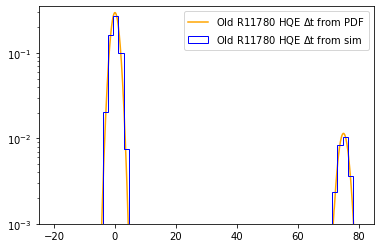

In [31]:
time_r11780_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r11780_old=[6.372073314671898e-51, 2.1131633185864248e-50, 6.965873393507018e-50, 2.282486955682661e-49, 7.434148734263409e-49, 2.4068243756973017e-48, 7.74546990506898e-48, 2.4776579742568847e-47, 7.87816644529279e-47, 2.4899989489405877e-46, 7.822820938125674e-46, 2.4429682868476552e-45, 7.583374136676322e-45, 2.3399002881174974e-44, 7.176661009672538e-44, 2.187951690736043e-43, 6.63045357607164e-43, 1.997280043505786e-42, 5.980326574612045e-42, 1.779922334898079e-41, 5.26583708618515e-41, 1.5485456015254664e-40, 4.526586179963315e-40, 1.3152484582168032e-39, 3.79870023495927e-39, 1.0905672709668396e-38, 3.1121470564342117e-38, 8.827911579962235e-38, 2.489121253328609e-37, 6.976287106069101e-37, 1.943537174854576e-36, 5.382097642459413e-36, 1.4814960813073116e-35, 4.053588467111433e-35, 1.1024756809124556e-34, 2.9804963546109635e-34, 8.009370534026972e-34, 2.1394315226246646e-33, 5.6805267493077246e-33, 1.499232686088938e-32, 3.9331425680993246e-32, 1.025653224826475e-31, 2.658591578999612e-31, 6.850036944439124e-31, 1.754383026016413e-30, 4.466281928181497e-30, 1.1302071878163281e-29, 2.8428910097446936e-29, 7.108084291771683e-29, 1.7665874567025546e-28, 4.364233008660167e-28, 1.071694325137876e-27, 2.615918121229821e-27, 6.3469865168280925e-27, 1.5307392533553498e-26, 3.6696536504626375e-26, 8.744583881875128e-26, 2.0713020431611135e-25, 4.876833550885645e-25, 1.1413599960220382e-24, 2.655202047844847e-24, 6.1399200492066535e-24, 1.411295873618683e-23, 3.2245093566650777e-23, 7.323175215582903e-23, 1.653200100806987e-22, 3.7097243010235213e-22, 8.27462004376018e-22, 1.8346139894096425e-21, 4.04325893334334e-21, 8.85744823276669e-21, 1.9287498479654254e-20, 4.174778141764092e-20, 8.982166703877571e-20, 1.9209631561615657e-19, 4.083637407372974e-19, 8.629100471943601e-19, 1.812483626501496e-18, 3.7841894646148506e-18, 7.85347501906276e-18, 1.6200972134503185e-17, 3.322083142778617e-17, 6.771270040389411e-17, 1.3718921923028227e-16, 2.7628674442252137e-16, 5.530830225928202e-16, 1.1005526407715145e-15, 2.1768150273913907e-15, 4.279789881129003e-15, 8.3639914911029e-15, 1.6247813713846335e-14, 3.137375450406486e-14, 6.021826947198833e-14, 1.1488947944049047e-13, 2.1788255862146892e-13, 4.1072854393635184e-13, 7.696220795095616e-13, 1.4334758002057746e-12, 2.653954217456397e-12, 4.8841242293023736e-12, 8.934498720972823e-12, 1.624590443449844e-11, 2.936349939911432e-11, 5.2754795359467e-11, 9.42120140171483e-11, 1.6724026512938806e-10, 2.950975614902548e-10, 5.175837206563721e-10, 9.023724128130457e-10, 1.5638000589476573e-09, 2.6938093420765366e-09, 4.612567113817542e-09, 7.850706760638125e-09, 1.328204745448921e-08, 2.233631436205039e-08, 3.733775597476173e-08, 6.20404767896443e-08, 1.0246894258358211e-07, 1.6822850923678968e-07, 2.745346412815021e-07, 4.453330450046839e-07, 7.180635902840416e-07, 1.1508828123043141e-06, 1.83353631596558e-06, 2.9036090565044906e-06, 4.570639646285381e-06, 7.151646452087812e-06, 1.1123086249136019e-05, 1.7196291050064603e-05, 2.6426185747314083e-05, 4.0366806568536575e-05, 6.129210232270694e-05, 9.250705523083865e-05, 0.00013878272440077065, 0.00020695988538664906, 0.0003067800795294448, 0.0004520207278174844, 0.0006620331841247318, 0.0009638098966121301, 0.0013947398772530249, 0.002006251011731002, 0.002868583747346571, 0.004076993436162157, 0.005759737687649633, 0.00808826947098127, 0.011290124544559845, 0.01566506018207965, 0.021605066960236095, 0.029618930975411982, 0.04036206306817602, 0.05467232558167952, 0.07361256534713626, 0.09852049200379624, 0.1310664103702259, 0.1733191108640936, 0.22781992978755752, 0.29766460005292444, 0.386592013947504, 0.49907840871749026, 0.6404347653282818, 0.8169043911638455, 1.0357567590277081, 1.3053727293724322, 1.635315334358842, 2.03637940790482, 2.5206125740307463, 3.101299535329284, 3.792901319994621, 4.610941237660045, 5.571829845990198, 6.692622315789785, 7.99070325829055, 9.483396373789702, 11.187499191126951, 13.118746646567928, 15.291211206162009, 17.716651526416552, 20.403826085073682, 23.35779256453978, 26.57921776841303, 30.06372620863359, 33.8013179247082, 37.775887310376156, 41.96487448727774, 46.339078899059935, 50.862661201901666, 55.49335419435788, 60.18289656504033, 64.8776948590741, 69.51970960253261, 74.04755140670294, 78.39776260915194, 82.50625015608315, 86.30982656831905, 89.74780851950828, 92.76361728907354, 95.30632253709925, 97.33207075844022, 98.80534253028468, 99.69998822488654, 100.0, 99.69998822488313, 98.80534253027793, 97.33207075843025, 95.30632253708623, 92.76361728905769, 89.74780851948988, 86.30982656829842, 82.5062501560606, 78.39776260912782, 74.04755140667764, 69.51970960250648, 64.87769485904751, 60.1828965650136, 55.493354194331346, 50.8626612018756, 46.33907889903462, 41.96487448725337, 37.77588731035293, 33.80131792468626, 30.063726208613055, 26.57921776839396, 23.35779256452222, 20.403826085057652, 17.71665152640203, 15.29121120614895, 13.118746646556275, 11.187499191116629, 9.483396373780636, 7.990703258282633, 6.692622315782924, 5.571829845984299, 4.610941237655006, 3.792901319990344, 3.101299535325681, 2.5206125740277328, 2.036379407902316, 1.6353153343567752, 1.305372729370738, 1.0357567590263281, 0.8169043911627296, 0.6404347653273853, 0.49907840871677445, 0.38659201394693604, 0.29766460005247714, 0.22781992978720725, 0.17331911086382112, 0.13106641037001557, 0.09852049200363473, 0.07361256534701308, 0.05467232558158614, 0.040362063068105684, 0.02961893097535936, 0.021605066960196984, 0.01566506018205074, 0.011290124544538625, 0.008088269470965796, 0.005759737687638409, 0.004076993436154082, 0.0028685837473407926, 0.0020062510117268896, 0.0013947398772501188, 0.0009638098966100892, 0.0006620331841233065, 0.00045202072781649595, 0.0003067800795287636, 0.00020695988538618258, 0.00013878272440045287, 9.250705523062372e-05, 6.129210232256257e-05, 4.0366806568440054e-05, 2.6426185747250006e-05, 1.7196291050022326e-05, 1.1123086249108277e-05, 7.151646452069747e-06, 4.570639646273673e-06, 2.9036090564969503e-06, 1.8335363159607598e-06, 1.1508828123012477e-06, 7.180635902821053e-07, 4.4533304500346575e-07, 2.745346412807423e-07, 1.682285092363187e-07, 1.0246894258329161e-07, 6.204047678946643e-08, 3.733775597465335e-08, 2.2336314361984844e-08, 1.3282047454449716e-08, 7.850706760614529e-09, 4.612567113803515e-09, 2.6938093420717261e-09, 1.5638000589465127e-09, 9.0237241281419504e-10, 5.1758372065899754e-10, 2.9509756149388274e-10, 1.6724026513374968e-10, 9.4212014022095483e-11, 5.2754795364925514e-11, 2.9363499405053744e-11, 1.6245904440914595e-11, 8.9344987278778131e-12, 4.8841242367188014e-12, 2.6539542254139462e-12, 1.4334758087393204e-12, 7.696220886582641e-13, 4.1072855374314523e-13, 2.1788256913292138e-13, 1.1488949070681125e-13, 6.0218281547159611e-14, 3.1373767446034199e-14, 1.6247827584769747e-14, 8.3640063576242317e-15, 4.2798058146896712e-15, 2.1768321045680457e-15, 1.1005709436409771e-15, 5.5310263912502662e-16, 2.7630776890240098e-16, 1.372117527105061e-16, 6.7736851190331503e-17, 3.3246715599947045e-17, 1.6228714103403212e-17, 7.8832081251670319e-18, 3.816056618715209e-18, 1.8466379966021201e-18, 8.9951579470235504e-19, 4.4759680949484329e-19, 2.3414527756539785e-19, 1.3488862858366814e-19, 9.004935483883513e-20, 7.1055843071349159e-20, 6.4341386165631362e-20, 6.350947120682255e-20, 6.5568922221685847e-20, 6.9136202220843242e-20, 7.3582467453399948e-20, 7.8631457528660113e-20, 8.4171155652293191e-20, 9.0166168184130867e-20, 9.6617259801490325e-20, 1.0354282910360993e-19, 1.1097053106785683e-19, 1.189335659069918e-19, 1.2746910414792531e-19, 1.3661768756314762e-19, 1.464230774924389e-19, 1.5693231173369841e-19, 1.681958631076696e-19, 1.80267852528117e-19, 1.9320629630142844e-19, 2.0707337943881787e-19, 2.2193575216804344e-19, 2.3786484927065264e-19, 2.5493723300022377e-19, 2.7323496089431823e-19, 2.9284598010450511e-19, 3.1386455007879324e-19, 3.3639169560231184e-19, 3.605356923629495e-19, 3.8641258737129035e-19, 4.1414675673435376e-19, 4.4387150346328402e-19, 4.7572969818800759e-19, 5.0987446585829647e-19, 5.4646992173178608e-19, 5.856919601864126e-19, 6.2772910014866019e-19, 6.7278339120112157e-19, 7.2107138472453612e-19, 7.7282517474205637e-19, 8.282935134685106e-19, 8.8774300692649814e-19, 9.5145939637599438e-19, 1.019748931716592e-18, 1.0929398434635787e-18, 1.1713839203728352e-18, 1.2554582002973321e-18, 1.3455667824022564e-18, 1.4421427694490865e-18, 1.5456503494841283e-18, 1.6565870269370372e-18, 1.775486013853014e-18, 1.902918792752008e-18, 2.039497863433204e-18, 2.1858796869271794e-18, 2.3427678407456936e-18, 2.5109164005946893e-18, 2.691133564804539e-18, 2.8842855388982015e-18, 3.0913006989682871e-18, 3.3131740538741075e-18, 3.5509720277060627e-18, 3.805837585504053e-18, 4.078995726866448e-18, 4.3717593738544011e-18, 4.6855356814914341e-18, 5.0218328011894287e-18, 5.3822671296091312e-18, 5.76857107779646e-18, 6.1826013979366343e-18, 6.6263481077482804e-18, 7.1019440554121946e-18, 7.61167517100818e-18, 8.1579914537329762e-18, 8.7435187477088885e-18, 9.3710713629829576e-18, 1.0043665602378956e-17, 1.0764534259218369e-17, 1.1537142155593034e-17, 1.236520279587339e-17, 1.325269621549669e-17, 1.4203888110824531e-17, 1.5223350342016508e-17, 1.6315982907466116e-17, 1.7487037495417947e-17, 1.8742142725966103e-17, 2.0087331204758112e-17, 2.1529068518436953e-17, 2.3074284311186296e-17, 2.473040559174703e-17, 2.6505392430993646e-17, 2.8407776221649339e-17, 3.0446700684033324e-17, 3.2631965814932552e-17, 3.4974074990836244e-17, 3.748428545193257e-17, 4.0174662409516613e-17, 4.3058137036874326e-17, 4.6148568622373048e-17, 4.9460811183494547e-17, 5.3010784861987803e-17, 5.6815552443299258e-17, 6.089340136806724e-17, 6.5263931629865745e-17, 6.9948149981673179e-17, 7.4968570903865892e-17, 8.0349324819034026e-17, 8.6116274073749502e-17, 9.2297137244747008e-17, 9.8921622366990056e-17, 1.0602156972397667e-16, 1.136311048865996e-16, 1.2178680273613569e-16, 1.3052786325973277e-16, 1.3989629996334771e-16, 1.4993714180773324e-16, 1.6069864963806961e-16, 1.7223254814750065e-16, 1.8459427448949584e-16, 1.9784324473398206e-16, 2.120431394479554e-16, 2.2726220977320142e-16, 2.4357360547227374e-16, 2.6105572651946811e-16, 2.7979259992669824e-16, 2.9987428361546948e-16, 3.2139729927614242e-16, 3.4446509629500476e-16, 3.6918854897899523e-16, 3.9568648946796801e-16, 4.2408627889591499e-16, 4.5452441954640738e-16, 4.8714721094455231e-16, 5.2211145303894134e-16, 5.59585199853402e-16, 5.9974856723094478e-16, 6.4279459855229124e-16, 6.8893019259001633e-16, 7.3837709795799796e-16, 7.9137297893594382e-16, 8.4817255779183827e-16, 9.0904883909282383e-16, 9.7429442188911429e-16, 1.0442229060778929e-15, 1.1191703997068148e-15, 1.1994971344619014e-15, 1.2855891971045951e-15, 1.3778603851800461e-15, 1.4767541959160101e-15, 1.5827459578719032e-15, 1.6963451155836933e-15, 1.818097678185665e-15, 1.9485888437782479e-15, 2.0884458121558068e-15, 2.2383407994136522e-15, 2.3989942689238265e-15, 2.5711783942092155e-15, 2.7557207703601193e-15, 2.9535083918320494e-15, 3.165491915743838e-15, 3.3926902311674197e-15, 3.6361953563713663e-15, 3.8971776875565337e-15, 4.1768916243116546e-15, 4.4766815988273477e-15, 4.7979885378477003e-15, 5.1423567884184814e-15, 5.5114415407202931e-15, 5.9070167836641572e-15, 6.3309838314877383e-15, 6.7853804623349073e-15, 7.2723907127428052e-15, 7.7943553751131431e-15, 8.3537832486233912e-15, 8.9533631976547838e-15, 9.5959770756954936e-15, 1.0284713576837065e-14, 1.1022883081440697e-14, 1.1814033567328431e-14, 1.26619676629756e-14, 1.3570760924669947e-14, 1.4544781425485749e-14, 1.5588710750226441e-14, 1.670756649724695e-14, 1.7906726395309744e-14, 1.919195415139118e-14, 2.0569427153674329e-14, 2.2045766162881608e-14, 2.362806713465709e-14, 2.5323935325951449e-14, 2.7141521849340163e-14, 2.9089562850971789e-14, 3.1177421500453185e-14, 3.3415132994494228e-14, 3.5813452790619842e-14, 3.8383908302782744e-14, 4.1138854307349069e-14, 4.4091532325763651e-14, 4.7256134269314646e-14, 5.0647870651903396e-14, 5.4283043698680855e-14, 5.8179125701944158e-14, 6.2354843000907e-14, 6.6830265988989111e-14, 7.1626905581240378e-14, 7.6767816605566233e-14, 8.2277708614698933e-14, 8.8183064651528173e-14, 9.4512268538630226e-14, 1.0129574130380779e-13, 1.0856608739736278e-13, 1.1635825140388945e-13, 1.2470968600181521e-13, 1.3366053197797954e-13, 1.4325381116248217e-13, 1.5353563321113396e-13, 1.6455541722939951e-13, 1.7636612930305806e-13, 1.8902453707726232e-13, 2.0259148260761757e-13, 2.1713217479472774e-13, 2.3271650280778118e-13, 2.494193720036329e-13, 2.6732106395596165e-13, 2.8650762232496717e-13, 3.0707126642227099e-13, 3.291108344588022e-13, 3.5273225860611961e-13, 3.7804907415452838e-13, 4.0518296521523908e-13, 4.3426434958945972e-13, 4.65433005615567e-13, 4.9883874400727074e-13, 5.3464212791192854e-13, 5.7301524464994009e-13, 6.1414253284454804e-13, 6.5822166891761096e-13, 7.0546451721224609e-13, 7.5609814830906423e-13, 8.1036593043048624e-13, 8.6852869917892802e-13, 9.3086601123114328e-13, 9.9767748801455118e-13, 1.0692842558238676e-12, 1.1460304892998915e-12, 1.228285065689108e-12, 1.316443337835235e-12, 1.4109290344245061e-12, 1.5121962966181434e-12, 1.6207318608609884e-12, 1.737057398357873e-12, 1.8617320224623043e-12, 1.9953549760291222e-12, 2.1385685116477562e-12, 2.2920609785998056e-12, 2.4565701313782406e-12, 2.6328866756704955e-12, 2.8218580688490405e-12, 3.0243925932363167e-12, 3.2414637217220092e-12, 3.4741147967157807e-12, 3.7234640449246458e-12, 3.9907099520582831e-12, 4.2771370232955552e-12, 4.5841219571996556e-12, 4.9131402627565289e-12, 5.2657733513410435e-12, 5.6437161376981367e-12, 6.0487851864726931e-12, 6.4829274434440814e-12, 6.9482295934316293e-12, 7.446928089849366e-12, 7.9814199041166453e-12, 8.5542740465911943e-12, 9.1682439143994017e-12, 9.8262805255131532e-12, 1.053154670268219e-11, 1.1287432275396383e-11, 1.2097570372945506e-11, 1.296585488688829e-11, 1.3896459186863396e-11, 1.4893856179698877e-11, 1.5962839808233449e-11, 1.7108548093182557e-11, 1.8336487828798984e-11, 1.9652561051026503e-11, 2.1063093405364591e-11, 2.257486455079299e-11, 2.4195140745891244e-11, 2.5931709773776839e-11, 2.7792918373727063e-11, 2.9787712359398045e-11, 3.1925679616467215e-11, 3.4217096186365449e-11, 3.6672975657598324e-11, 3.9305122102053401e-11, 4.2126186810729602e-11, 4.5149729101586431e-11, 4.839028149178298e-11, 5.1863419547554189e-11, 5.5585836747454682e-11, 5.9575424718796698e-11, 6.385135923293505e-11, 6.8434192372731584e-11, 7.3345951315197372e-11, 7.8610244204107552e-11, 8.4252373621460006e-11, 9.0299458203173742e-11, 9.678056298356689e-11, 1.037268390951094e-10, 1.1117167349491045e-10, 1.1915084943759453e-10, 1.2770271846587072e-10, 1.3686838474546451e-10, 1.4669190263039692e-10, 1.5722048840821668e-10, 1.6850474724292086e-10, 1.8059891640634927e-10, 1.9356112596713665e-10, 2.0745367819022084e-10, 2.2234334698982196e-10, 2.383016988751914e-10, 2.5540543693174651e-10, 2.7373676949093171e-10, 2.9338380526079383e-10, 3.1444097681643641e-10, 3.3700949448584835e-10, 3.611978328127021e-10, 3.871222519342733e-10, 4.1490735638044571e-10, 4.4468669397965276e-10, 4.7660339775038765e-10, 5.1081087386349301e-10, 5.474735389818688e-10, 5.8676761052159924e-10, 6.2888195363287913e-10, 6.7401898897169669e-10, 7.2239566562541123e-10, 7.7424450386856169e-10, 8.298147127608997e-10, 8.8937338795930552e-10, 9.532067955007844e-10, 1.0216217477270061e-09, 1.0949470779637484e-09, 1.1735352210431985e-09, 1.2577639072657705e-09, 1.3480379779434201e-09, 1.4447913312508367e-09, 1.5484890077371234e-09, 1.6596294255218159e-09, 1.778746775918646e-09, 1.9064135910015878e-09, 2.0432434954540122e-09, 2.1898941559275182e-09, 2.3470704420864433e-09, 2.5155278145315662e-09, 2.6960759558868401e-09, 2.889582662501702e-09, 3.096978015474308e-09, 3.3192588510436641e-09, 3.557493551837292e-09, 3.8128271820032137e-09, 4.0864869909081054e-09, 4.3797883118550803e-09, 4.6941408841728866e-09, 5.0310556290631811e-09, 5.3921519117737861e-09, 5.7791653250034603e-09, 6.193956030948616e-09, 6.6385177020873936e-09, 7.1149871036747246e-09, 7.6256543640065002e-09, 8.1729739818162108e-09, 8.7595766237102466e-09, 9.3882817683459585e-09, 1.0062111258126461e-08, 1.0784303823547572e-08, 1.1558330650007036e-08, 1.2387912061897477e-08, 1.327703540417492e-08, 1.4229974207349449e-08, 1.5251308728013153e-08, 1.6345947963632739e-08, 1.7519153247420665e-08, 1.8776563536691917e-08, 2.0124222516253122e-08, 2.1568607647095575e-08, 2.3116661300014301e-08, 2.4775824123794954e-08, 2.6554070808350097e-08, 2.8459948414699458e-08, 3.0502617456026603e-08, 3.2691895927265478e-08, 3.5038306494841674e-08, 3.7553127073384575e-08, 4.024844503250664e-08, 4.3137215294191149e-08, 4.6233322600029045e-08, 4.9551648247590893e-08, 5.3108141616700717e-08, 5.6919896829398915e-08, 6.1005234912053815e-08, 6.5383791854532241e-08, 7.007661298968405e-08, 7.510625414676915e-08, 8.0496890065014087e-08, 8.6274430588383966e-08, 9.2466645200059017e-08, 9.9103296495181786e-08, 1.0621628323340248e-07, 1.1383979365880007e-07, 1.2201046982410882e-07, 1.3076758370906448e-07, 1.4015322597936948e-07, 1.5021250829354126e-07, 1.6099378013002974e-07, 1.7254886117676793e-07, 1.8493329040011986e-07, 1.9820659299036746e-07, 2.1243256646680708e-07, 2.2767958731760013e-07, 2.4402093964822002e-07, 2.615351674181342e-07, 2.8030645195874171e-07, 3.0042501658708253e-07, 3.219875602600627e-07, 3.4509772235354275e-07, 3.6986658080024343e-07, 3.9641318598073493e-07, 4.2486513293361834e-07, 4.5535917463520927e-07, 4.8804187929644492e-07, 5.2307033483626841e-07, 5.6061290391748892e-07, 6.0085003317417681e-07, 6.4397512052013155e-07, 6.9019544470708549e-07, 7.3973316160049405e-07, 7.9282637196148553e-07, 8.4973026586724504e-07, 9.1071834927041854e-07, 9.7608375859289936e-07, 1.0461406696725574e-06, 1.1212258078349889e-06, 1.2017000663483536e-06, 1.2879502410402758e-06, 1.3803908894141981e-06, 1.4794663232010025e-06, 1.5856527439229711e-06, 1.6994605317345068e-06, 1.8214366985408729e-06, 1.9521675171858178e-06, 2.0922813393451147e-06, 2.2424516156699997e-06, 2.4034001326967551e-06, 2.575900482080577e-06, 2.7607817788283962e-06, 2.9589326464020338e-06, 3.1713054878460044e-06, 3.3989210634690467e-06, 3.6428733970817457e-06, 3.9043350343716754e-06, 4.1845626786903116e-06, 4.4849032313400435e-06, 4.8068002653935102e-06, 5.1518009641612057e-06, 5.5215635576569008e-06, 5.9178652928041269e-06, 6.3426109756920087e-06, 6.7978421269381619e-06, 7.2857467941636354e-06, 7.808670068743427e-06, 8.3691253573806232e-06, 8.9698064626801785e-06, 9.6136005307872135e-06, 1.0303601928322525e-05, 1.1043127115313822e-05, 1.1835730585608408e-05, 1.2685221951384338e-05, 1.359568425387659e-05, 1.4571493588327522e-05, 1.5617340137487471e-05, 1.6738250714762446e-05, 1.7939612925362139e-05, 1.9227201061577385e-05, 2.0607203856650674e-05, 2.2086254230637984e-05, 2.3671461171235054e-05, 2.5370443902801262e-05, 2.7191368507812153e-05, 2.9142987176760916e-05, 3.1234680275163287e-05, 3.3476501429859151e-05, 3.5879225851316212e-05, 3.8454402124197854e-05, 4.1214407715130126e-05, 4.417250846446887e-05, 4.7342922348021569e-05, 5.074088781521128e-05, 5.4382737032180128e-05, 5.8285974381921619e-05, 6.2469360598828874e-05, 6.6953002942183099e-05, 7.1758451842215038e-05, 7.6908804483607527e-05, 8.2428815824855687e-05, 8.8345017587969149e-05, 9.4685845791815944e-05, 0.00010148177744425123, 0.00010876547705340964, 0.00011657195366761143, 0.00012493872920680464, 0.00013390601890709097, 0.00014351692476470481, 0.00015381764293825496, 0.00016485768615002839, 0.00017669012222143481, 0.00018937182998809233, 0.00020296377397202779, 0.00021753129934955602, 0.00023314444895423326, 0.00024987830430975918, 0.0002678133530185334, 0.00028703588526642244, 0.00030763842278266445, 0.00032972018436993748, 0.00035338759316716348, 0.00037875483222632185, 0.00040594445690834611, 0.00043508807521084523, 0.00046632711066858302, 0.00049981366722730725, 0.00053571152188808496, 0.00057419727947721397, 0.00061546173528845207, 0.00065971150642433096, 0.00070717101250795543, 0.00075808491238842904, 0.00081272113717913575, 0.00087137470347234717, 0.00093437254630902194, 0.0010020796823617965, 0.0010749071032369135, 0.0011533219107840535, 0.0012378603453392575, 0.0013291445289604702, 0.0014279039544537366, 0.0015350030031730814, 0.0016514760761895302, 0.0017785722802952735, 0.0019178120277197814, 0.00207105839059573, 0.0022406066005980691, 0.0024292957007135273, 0.0026406470361854894, 0.0028790350070911014, 0.0031498962816379574, 0.0034599844658024181, 0.0038176780114803693, 0.0042333498820968001, 0.0047198081307679614, 0.005292817018815189, 0.0059717085364610579, 0.006780094095394173, 0.0077466856457448392, 0.0089062344196623056, 0.010300593805646121, 0.011979910395755636, 0.014003943909573583, 0.016443512383578919, 0.019382053641958212, 0.022917287584879181, 0.02716295623449011, 0.032250609812321827, 0.038331397494215047, 0.045577811085975639, 0.054185318955110445, 0.064373816502855674, 0.076388808721613438, 0.090502230502459868, 0.10701280196511165, 0.12624580987603221, 0.14855220294198343, 0.17430688917437917, 0.20390612835048508, 0.23776392252153089, 0.2763073230915839, 0.31997059460503657, 0.36918820320739754, 0.42438663168964214, 0.48597506268721224, 0.522350703634044, 0.5955291389167735, 0.6759485651655683, 0.7638253842040637, 0.859299039127604, 0.9624193971631568, 1.0731346331486185, 1.1912800172729123, 1.316568030374593, 1.4485802362702476, 1.5867613314368505, 1.7304157665693096, 1.8787072913679845, 2.030661713404454, 2.1851730848958715, 2.3410134393580964, 2.496846095908443, 2.6512424357345195, 2.802701936900517, 2.949675134723868, 3.0905890602669985, 3.2238746040224897, 3.3479951604845484, 3.461475836491872, 3.5629324558876787, 3.6510995682339864, 3.724856672083207, 3.7832518945334788, 3.8255224281112477, 3.8511111118045704, 3.8596786524611213, 3.8511111118041086, 3.8255224281103293, 3.7832518945321167, 3.724856672081419, 3.6510995682317957, 3.562932455885113, 3.461475836488965, 3.347995160481334, 3.223874604019008, 3.09058906026329, 2.9496751347199743, 2.8027019368964807, 2.6512424357303837, 2.496846095904248, 2.3410134393538824, 2.185173084891676, 2.0306617134003115, 1.8787072913639264, 1.730415766565364, 1.586761331433042, 1.4485802362665972, 1.3165680303711174, 1.1912800172696243, 1.0731346331455278, 0.9624193971602696, 0.8592990391249228, 0.7638253842015889, 0.675948565163297, 0.5955291389147009, 0.5223507036321636, 0.4561326438166176, 0.3965426703361774, 0.3432088686496009, 0.29573101836450144, 0.253690998758353, 0.2166621457713881, 0.18421747446261302, 0.15593672553809704, 0.13141223420945092, 0.11025365357471477, 0.09209159253020996, 0.07658024982610301, 0.06339914144306752, 0.05225402838291559, 0.04287715678879646, 0.03502692271117899, 0.028487070550527283, 0.023065527994403548, 0.01859297186842219]

for i in range(len(prob_r11780_old)):
    prob_r11780_old[i]=prob_r11780_old[i]/1000*2.959
    
sum=0
for i in prob_r11780_old:
    sum+=i
print(sum)
    
plt.plot(time_r11780_old,prob_r11780_old,label='Old R11780 HQE $\Delta$t from PDF',color='orange')
plt.hist(r11780_deltat_old,bins=50,density=True,histtype='step',color='blue',label='Old R11780 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
plt.ylim(1e-3,3.5e-1)

9.99224309113361


(0.001, 0.35)

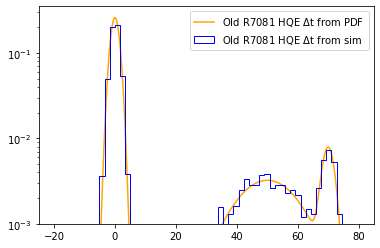

In [32]:
time_r7081_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r7081_old=[ 4.93629671886e-15 , 5.32612775326e-15 , 5.74612024813e-15 , 6.19855772134e-15 , 6.68589263156e-15 , 7.21075857257e-15 , 7.77598332464e-15 , 8.38460282169e-15 , 9.0398760965e-15 , 9.74530127072e-15 , 1.05046326604e-14 , 1.13218990728e-14 , 1.2201423375e-14 , 1.31478434201e-14 , 1.41661344225e-14 , 1.52616328797e-14 , 1.64400621445e-14 , 1.77075597577e-14 , 1.90707066591e-14 , 2.05365584029e-14 , 2.21126785094e-14 , 2.38071740956e-14 , 2.56287339366e-14 , 2.7586669117e-14 , 2.96909564441e-14 , 3.19522848056e-14 , 3.43821046631e-14 , 3.69926808899e-14 , 3.979714917e-14 , 4.28095761919e-14 , 4.6045023884e-14 , 4.95196179556e-14 , 5.32506210214e-14 , 5.72565106085e-14 , 6.15570623591e-14 , 6.61734387668e-14 , 7.11282838003e-14 , 7.64458237945e-14 , 8.21519750098e-14 , 8.82744582863e-14 , 9.48429212461e-14 , 1.01889068525e-13 , 1.0944680054e-13 , 1.17552361343e-13 , 1.26244496125e-13 , 1.35564618987e-13 , 1.45556991619e-13 , 1.56268913588e-13 , 1.67750924934e-13 , 1.80057021878e-13 , 1.9324488644e-13 , 2.07376130833e-13 , 2.22516557571e-13 , 2.38736436239e-13 , 2.56110797984e-13 , 2.74719748796e-13 , 2.94648802761e-13 , 3.15989236494e-13 , 3.38838466063e-13 , 3.63300447783e-13 , 3.89486104326e-13 , 4.17513777702e-13 , 4.47509710739e-13 , 4.79608558793e-13 , 5.13953933516e-13 , 5.50698980627e-13 , 5.90006993718e-13 , 6.32052066295e-13 , 6.7701978432e-13 , 7.25107961718e-13 , 7.7652742143e-13 , 8.31502824781e-13 , 8.90273552119e-13 , 9.53094637985e-13 , 1.02023776435e-12 , 1.09199231605e-12 , 1.16866650327e-12 , 1.25058855732e-12 , 1.33810800815e-12 , 1.43159705604e-12 , 1.53145205668e-12 , 1.63809515137e-12 , 1.75197609543e-12 , 1.87357437608e-12 , 2.00340177823e-12 , 2.14200567318e-12 , 2.2899735086e-12 , 2.44793932912e-12 , 2.61659375956e-12 , 2.79669991188e-12 , 2.98911942315e-12 , 3.19485577657e-12 , 3.41512699331e-12 , 3.65148800378e-12 , 3.90603661558e-12 , 4.1817593792e-12 , 4.483110241e-12 , 4.81697429981e-12 , 5.19426489188e-12 , 5.63255602565e-12 , 6.16039722816e-12 , 6.82434576285e-12 , 7.70036122894e-12 , 8.91216072039e-12 , 1.06606122001e-11 , 1.32705249533e-11 , 1.72646899532e-11 , 2.3480338537e-11 , 3.32512199881e-11 , 4.86905531234e-11 , 7.31280737521e-11 , 1.11780992951e-10 , 1.7277776671e-10 , 2.68710618104e-10 , 4.18975401939e-10 , 6.53276290266e-10 , 1.01684252439e-09 , 1.57814510299e-09 , 2.4402397681e-09 , 3.75733518735e-09 , 5.75883978294e-09 , 8.78404019409e-09 , 1.33317906475e-08 , 2.01312505548e-08 , 3.02419307123e-08 , 4.51942635487e-08 , 6.71858064634e-08 , 9.93532710884e-08 , 1.46147147206e-07 , 2.13844113846e-07 , 3.1124311283e-07 , 4.50604365663e-07 , 6.48907252611e-07 , 9.29523383092e-07 , 1.32442591639e-06 , 1.87708575976e-06 , 2.64624011835e-06 , 3.71075929708e-06 , 5.17588373063e-06 , 7.18115469268e-06 , 9.9104183083e-06 , 1.36043420866e-05 , 1.85759441979e-05 , 2.52296952574e-05 , 3.40848065481e-05 , 4.58033623737e-05 , 6.12239813087e-05 , 8.1401694008e-05 , 0.00010765469523 , 0.00014161855513 , 0.000185308349252 , 0.000241188977309 , 0.000312253677574 , 0.00040211039729 , 0.000515075243216 , 0.000656271706546 , 0.000831733734043 , 0.00104851000914 , 0.00131476602695 , 0.00163987971776 , 0.00203452552574 , 0.00251074102398 , 0.003081969393 , 0.00376307046595 , 0.00457029261449 , 0.00552119758283 , 0.00663453054418 , 0.00793002821809 , 0.00942815890615 , 0.0111497898197 , 0.0131157791082 , 0.0153464925483 , 0.017861247885 , 0.020677693266 , 0.0238111299635 , 0.027273793507 , 0.0310741112728 , 0.0352159582939 , 0.0396979363453 , 0.0445127039928 , 0.0496463870452 , 0.055078099503 , 0.0607796044873 , 0.0667151426254 , 0.0728414519059 , 0.0791079981062 , 0.0854574286284 , 0.0918262551367 , 0.0981457620242 , 0.104343128791 , 0.110342745271 , 0.116067689748 , 0.121441331809 , 0.12638901473 , 0.130839766691 , 0.134727986567 , 0.137995048627 , 0.140590771428 , 0.142474699549 , 0.143617152422 , 0.144000002272 , 0.143617152669 , 0.142474700044 , 0.140590772172 , 0.137995049621 , 0.134727987815 , 0.130839768196 , 0.126389016495 , 0.12144133384 , 0.116067692049 , 0.110342747849 , 0.104343131652 , 0.0981457651761 , 0.0918262585875 , 0.0854574323871 , 0.0791080021825 , 0.0728414563104 , 0.0667151473694 , 0.0607796095831 , 0.0550781049636 , 0.0496463928845 , 0.0445127102258 , 0.0396979429878 , 0.0352159653628 , 0.0310741187859 , 0.0272738014833 , 0.0238111384231 , 0.0206777022301 , 0.0178612573758 , 0.0153465025896 , 0.0131157897249 , 0.011149801038 , 0.00942817075371 , 0.00793004072396 , 0.00663454373894 , 0.00552121149861 , 0.00457030728505 , 0.00376308592674 , 0.00308198568123 , 0.0025107581787 , 0.00203454358791 , 0.00163989873032 , 0.00131478603493 , 0.00104853105972 , 0.000831755876646 , 0.000656294992946 , 0.000515099727625 , 0.000402136136464 , 0.000312280730917 , 0.000241217406984 , 0.000185338220297 , 0.000141649935578 , 0.000107687656229 , 8.14363099558e-05 , 6.1260329986e-05 , 4.58415250829e-05 , 3.41248682597e-05 , 2.52717447607e-05 , 1.86200742587e-05 , 1.36506496096e-05 , 9.95900450699e-06 , 7.23212526535e-06 , 5.22934904288e-06 , 3.76683457152e-06 , 2.70504563143e-06 , 1.93874704594e-06 , 1.38907398009e-06 , 9.97294918396e-07 , 7.19944871266e-07 , 5.25056833419e-07 , 3.89265594505e-07 , 2.95598427362e-07 , 2.31802026882e-07 , 1.89084640487e-07 , 1.61177061093e-07 , 1.43636563729e-07 , 1.33334504919e-07 , 1.28081709577e-07 , 1.26356452878e-07 , 1.27108268408e-07 , 1.29617389749e-07 , 1.33394716469e-07 , 1.38111089094e-07 , 1.43547612669e-07 , 1.49560991625e-07 , 1.56059496671e-07 , 1.62986410737e-07 , 1.70308700526e-07 , 1.78009314794e-07 , 1.86081982993e-07 , 1.94527726424e-07 , 2.03352534668e-07 , 2.12565829819e-07 , 2.22179459945e-07 , 2.32207045835e-07 , 2.42663562164e-07 , 2.53565073245e-07 , 2.6492857017e-07 , 2.76771874105e-07 , 2.89113582519e-07 , 3.01973043226e-07 , 3.15370346368e-07 , 3.29326328002e-07 , 3.43862581236e-07 , 3.59001472298e-07 , 3.74766159928e-07 , 3.91180617068e-07 , 4.0826965419e-07 , 4.260589439e-07 , 4.44575046562e-07 , 4.63845436806e-07 , 4.83898530834e-07 , 5.04763714492e-07 , 5.26471372054e-07 , 5.49052915749e-07 , 5.72540815991e-07 , 5.96968632342e-07 , 6.22371045197e-07 , 6.48783888207e-07 , 6.76244181444e-07 , 7.04790165324e-07 , 7.34461335282e-07 , 7.65298477226e-07 , 7.97343703764e-07 , 8.30640491221e-07 , 8.65233717453e-07 , 9.0116970046e-07 , 9.38496237816e-07 , 9.77262646917e-07 , 1.01751980605e-06 , 1.05932019631e-06 , 1.10271794435e-06 , 1.14776886594e-06 , 1.19453051046e-06 , 1.24306220618e-06 , 1.29342510643e-06 , 1.34568223662e-06 , 1.39989854216e-06 , 1.45614093722e-06 , 1.51447835441e-06 , 1.57498179527e-06 , 1.63772438173e-06 , 1.70278140836e-06 , 1.77023039559e-06 , 1.84015114374e-06 , 1.91262578796e-06 , 1.9877388541e-06 , 2.06557731532e-06 , 2.14623064976e-06 , 2.22979089891e-06 , 2.31635272695e-06 , 2.40601348092e-06 , 2.49887325173e-06 , 2.59503493602e-06 , 2.69460429891e-06 , 2.79769003748e-06 , 2.90440384516e-06 , 3.01486047684e-06 , 3.12917781491e-06 , 3.24747693588e-06 , 3.369882178e-06 , 3.4965212094e-06 , 3.62752509714e-06 , 3.76302837689e-06 , 3.90316912333e-06 , 4.0480890212e-06 , 4.19793343705e-06 , 4.35285149155e-06 , 4.51299613251e-06 , 4.67852420834e-06 , 4.84959654221e-06 , 5.0263780066e-06 , 5.20903759845e-06 , 5.39774851469e-06 , 5.59268822823e-06 , 5.79403856438e-06 , 6.00198577756e-06 , 6.21672062833e-06 , 6.43843846079e-06 , 6.66733928008e-06 , 6.90362783019e-06 , 7.14751367188e-06 , 7.39921126065e-06 , 7.65894002483e-06 , 7.92692444369e-06 , 8.20339412543e-06 , 8.48858388509e-06 , 8.78273382237e-06 , 9.08608939918e-06 , 9.39890151688e-06 , 9.7214265933e-06 , 1.00539266393e-05 , 1.03966693347e-05 , 1.07499281041e-05 , 1.11139821919e-05 , 1.14891167362e-05 , 1.18756228429e-05 , 1.22737976582e-05 , 1.26839444403e-05 , 1.3106372631e-05 , 1.35413979247e-05 , 1.3989342338e-05 , 1.44505342767e-05 , 1.49253086023e-05 , 1.54140066968e-05 , 1.59169765263e-05 , 1.64345727028e-05 , 1.69671565442e-05 , 1.75150961332e-05 , 1.80787663737e-05 , 1.86585490454e-05 , 1.9254832857e-05 , 1.98680134962e-05 , 2.04984936782e-05 , 2.1146683192e-05 , 2.18129989434e-05 , 2.24978649965e-05 , 2.32017126118e-05 , 2.39249802817e-05 , 2.46681137636e-05 , 2.5431566109e-05 , 2.62157976908e-05 , 2.70212762261e-05 , 2.78484767967e-05 , 2.86978818656e-05 , 2.956998129e-05 , 3.04652723308e-05 , 3.13842596582e-05 , 3.23274553532e-05 , 3.32953789055e-05 , 3.42885572068e-05 , 3.53075245401e-05 , 3.63528225647e-05 , 3.7425000296e-05 , 3.85246140816e-05 , 3.96522275721e-05 , 4.08084116871e-05 , 4.1993744576e-05 , 4.32088115742e-05 , 4.44542051538e-05 , 4.57305248683e-05 , 4.70383772932e-05 , 4.83783759595e-05 , 4.97511412826e-05 , 5.11573004849e-05 , 5.25974875122e-05 , 5.40723429448e-05 , 5.55825139014e-05 , 5.7128653938e-05 , 5.87114229387e-05 , 6.03314870021e-05 , 6.19895183189e-05 , 6.36861950447e-05 , 6.54222011645e-05 , 6.71982263515e-05 , 6.90149658179e-05 , 7.08731201591e-05 , 7.2773395191e-05 , 7.47165017792e-05 , 7.67031556617e-05 , 7.87340772635e-05 , 8.08099915041e-05 , 8.29316275975e-05 , 8.50997188438e-05 , 8.73150024142e-05 , 8.95782191272e-05 , 9.18901132177e-05 , 9.42514320977e-05 , 9.66629261095e-05 , 9.91253482704e-05 , 0.00010163945401 , 0.0001042060009 , 0.000106825748372 , 0.000109499457434 , 0.000112227890374 , 0.000115011810455 , 0.000117851981606 , 0.000120749168099 , 0.000123704134225 , 0.000126717643956 , 0.000129790460602 , 0.000132923346459 , 0.000136117062446 , 0.000139372367744 , 0.000142690019414 , 0.000146070772016 , 0.000149515377218 , 0.000153024583394 , 0.000156599135221 , 0.000160239773265 , 0.000163947233554 , 0.000167722247155 , 0.000171565539736 , 0.000175477831119 , 0.000179459834835 , 0.000183512257664 , 0.000187635799172 , 0.000191831151241 , 0.00019609899759 , 0.000200440013295 , 0.000204854864298 , 0.000209344206914 , 0.00021390868733 , 0.000218548941095 , 0.000223265592618 , 0.000228059254643 , 0.000232930527732 , 0.00023787999974 , 0.000242908245286 , 0.000248015825215 , 0.000253203286067 , 0.000258471159531 , 0.000263819961902 , 0.000269250193536 , 0.000274762338301 , 0.000280356863019 , 0.000286034216921 , 0.000291794831084 , 0.000297639117879 , 0.000303567470411 , 0.000309580261961 , 0.000315677845428 , 0.000321860552769 , 0.000328128694442 , 0.00033448255885 , 0.00034092241178 , 0.000347448495856 , 0.000354061029978 , 0.00036076020878 , 0.000367546202077 , 0.000374419154324 , 0.000381379184072 , 0.000388426383439 , 0.000395560817569 , 0.000402782524111 , 0.000410091512697 , 0.000417487764424 , 0.000424971231346 , 0.000432541835971 , 0.000440199470766 , 0.000447943997667 , 0.000455775247603 , 0.000463693020018 , 0.000471697082417 , 0.000479787169905 , 0.00048796298475 , 0.000496224195946 , 0.000504570438795 , 0.000513001314493 , 0.000521516389733 , 0.000530115196317 , 0.000538797230784 , 0.000547561954048 , 0.000556408791052 , 0.000565337130432 , 0.000574346324201 , 0.000583435687444 , 0.000592604498031 , 0.000601851996342 , 0.000611177385012 , 0.000620579828691 , 0.000630058453824 , 0.000639612348439 , 0.000649240561967 , 0.000658942105069 , 0.000668715949487 , 0.000678561027911 , 0.000688476233869 , 0.000698460421636 , 0.000708512406157 , 0.000718630963001 , 0.000728814828327 , 0.000739062698875 , 0.000749373231978 , 0.000759745045598 , 0.000770176718377 , 0.000780666789718 , 0.000791213759883 , 0.00080181609012 , 0.000812472202805 , 0.000823180481615 , 0.000833939271717 , 0.000844746879988 , 0.000855601575253 , 0.00086650158855 , 0.000877445113418 , 0.000888430306209 , 0.000899455286426 , 0.000910518137083 , 0.000921616905089 , 0.000932749601662 , 0.00094391420276 , 0.000955108649542 , 0.000966330848851 , 0.00097757867372 , 0.00098884996391 , 0.00100014252646 , 0.00101145413628 , 0.00102278253673 , 0.0010341254403 , 0.00104548052919 , 0.00105684545608 , 0.00106821784472 , 0.00107959529078 , 0.00109097536248 , 0.00110235560144 , 0.00111373352345 , 0.00112510661926 , 0.00113647235546 , 0.00114782817532 , 0.00115917149967 , 0.00117049972778 , 0.00118181023835 , 0.00119310039038 , 0.00120436752417 , 0.0012156089623 , 0.00122682201062 , 0.0012380039593 , 0.00124915208383 , 0.00126026364608 , 0.00127133589542 , 0.00128236606973 , 0.0012933513966 , 0.00130428909437 , 0.00131517637329 , 0.0013260104367 , 0.00133678848215 , 0.00134750770258 , 0.00135816528756 , 0.00136875842442 , 0.00137928429948 , 0.00138974009932 , 0.00140012301192 , 0.00141043022798 , 0.00142065894211 , 0.00143080635413 , 0.00144086967028 , 0.00145084610451 , 0.00146073287976 , 0.0014705272292 , 0.00148022639755 , 0.00148982764233 , 0.00149932823512 , 0.0015087254629 , 0.00151801662929 , 0.00152719905583 , 0.00153627008326 , 0.00154522707281 , 0.00155406740747 , 0.00156278849323 , 0.00157138776039 , 0.00157986266477 , 0.00158821068897 , 0.00159642934365 , 0.0016045161687 , 0.00161246873452 , 0.0016202846432 , 0.00162796152972 , 0.00163549706318 , 0.00164288894792 , 0.00165013492471 , 0.00165723277193 , 0.00166418030663 , 0.00167097538574 , 0.00167761590707 , 0.00168409981048 , 0.00169042507889 , 0.00169658973936 , 0.00170259186407 , 0.00170842957137 , 0.00171410102674 , 0.00171960444375 , 0.00172493808501 , 0.00173010026306 , 0.00173508934129 , 0.00173990373479 , 0.00174454191117 , 0.0017490023914 , 0.00175328375059 , 0.00175738461874 , 0.00176130368147 , 0.00176503968075 , 0.00176859141553 , 0.0017719577424 , 0.00177513757623 , 0.0017781298907 , 0.0017809337189 , 0.00178354815384 , 0.00178597234891 , 0.00178820551838 , 0.0017902469378 , 0.00179209594438 , 0.00179375193737 , 0.00179521437838 , 0.00179648279169 , 0.00179755676445 , 0.00179843594697 , 0.00179912005288 , 0.00179960885927 , 0.00179990220685 , 0.0018 , 0.00179990220685 , 0.00179960885927 , 0.00179912005288 , 0.00179843594697 , 0.00179755676445 , 0.00179648279169 , 0.00179521437838 , 0.00179375193737 , 0.00179209594438 , 0.0017902469378 , 0.00178820551838 , 0.00178597234891 , 0.00178354815384 , 0.0017809337189 , 0.0017781298907 , 0.00177513757623 , 0.0017719577424 , 0.00176859141553 , 0.00176503968075 , 0.00176130368147 , 0.00175738461874 , 0.00175328375059 , 0.0017490023914 , 0.00174454191117 , 0.00173990373479 , 0.00173508934129 , 0.00173010026306 , 0.00172493808501 , 0.00171960444375 , 0.00171410102674 , 0.00170842957137 , 0.00170259186407 , 0.00169658973936 , 0.00169042507889 , 0.00168409981048 , 0.00167761590707 , 0.00167097538574 , 0.00166418030663 , 0.00165723277193 , 0.00165013492471 , 0.00164288894792 , 0.00163549706318 , 0.00162796152972 , 0.0016202846432 , 0.00161246873452 , 0.0016045161687 , 0.00159642934365 , 0.00158821068897 , 0.00157986266477 , 0.00157138776039 , 0.00156278849323 , 0.00155406740747 , 0.00154522707281 , 0.00153627008326 , 0.00152719905583 , 0.00151801662929 , 0.0015087254629 , 0.00149932823512 , 0.00148982764233 , 0.00148022639755 , 0.0014705272292 , 0.00146073287976 , 0.00145084610451 , 0.00144086967028 , 0.00143080635413 , 0.00142065894211 , 0.00141043022798 , 0.00140012301192 , 0.00138974009932 , 0.00137928429949 , 0.00136875842443 , 0.00135816528759 , 0.00134750770262 , 0.0013367884822 , 0.00132601043679 , 0.00131517637342 , 0.00130428909456 , 0.00129335139688 , 0.00128236607014 , 0.00127133589601 , 0.00126026364694 , 0.00124915208508 , 0.00123800396111 , 0.00122682201324 , 0.00121560896606 , 0.00120436752956 , 0.0011931003981 , 0.00118181024935 , 0.00117049974341 , 0.00115917152181 , 0.00114782820659 , 0.00113647239947 , 0.00112510668101 , 0.00111373360981 , 0.00110235572186 , 0.00109097552984 , 0.00107959552266 , 0.00106821816499 , 0.00105684589703 , 0.0010454811344 , 0.00103412626833 , 0.00102278366607 , 0.0010114556717 , 0.00100014460744 , 0.000988852775399 , 0.000977582460219 , 0.000966335932445 , 0.000955115453095 , 0.000943923279552 , 0.000932761673147 , 0.000921632908802 , 0.000910539287189 , 0.000899483149952 , 0.000888466898645 , 0.000877493018137 , 0.000866564105389 , 0.000855682904632 , 0.000844852350154 , 0.000834075618073 , 0.000823356188659 , 0.000812697920986 , 0.000802105141895 , 0.000791582751477 , 0.000781136347491 , 0.000770772371369 , 0.000760498278622 , 0.000750322736655 , 0.000740255853132 , 0.000730309438085 , 0.000720497302996 , 0.000710835599976 , 0.000701343203993 , 0.000692042140755 , 0.000682958062407 , 0.000674120772516 , 0.000665564800992 , 0.000657330028509 , 0.000649462358685 , 0.000642014434726 , 0.000635046395408 , 0.000628626663222 , 0.000622832755144 , 0.000617752103967 , 0.000613482875339 , 0.000610134762744 , 0.000607829739647 , 0.000606702744956 , 0.000606902274969 , 0.000608590852179 , 0.000611945338722 , 0.000617157060184 , 0.000624431703861 , 0.000633988954746 , 0.000646061832462 , 0.000660895693367 , 0.000678746864138 , 0.000699880876523 , 0.000724570277657 , 0.000753091996437 , 0.00078572425405 , 0.000822743015725 , 0.000864417991148 , 0.000911008202576 , 0.00096275715238 , 0.00101988763522 , 0.00108259625411 , 0.00115104771384 , 0.00122536897914 , 0.00130564339845 , 0.00139190490611 , 0.00148413242653 , 0.00158224461208 , 0.00168609505249 , 0.00179546809614 , 0.0019100754229 , 0.00202955350409 , 0.00215346207637 , 0.00228128374429 , 0.00241242480976 , 0.0025462174063 , 0.00268192299201 , 0.00281873722856 , 0.00295579624324 , 0.00309218424015 , 0.00322694239362 , 0.00335907892423 , 0.00348758022566 , 0.00361142287994 , 0.00372958637108 , 0.00384106628275 , 0.00394488774567 , 0.00404011888617 , 0.00412588401821 , 0.00420137631892 , 0.00426586973154 , 0.00431872985062 , 0.00435942356107 , 0.00438752722625 , 0.00440273324917 , 0.0044048548643 , 0.00439382905555 , 0.00436971753651 , 0.00433270577121 , 0.00428310005718 , 0.00422132273456 , 0.00414790562602 , 0.00406348184959 , 0.00396877618062 , 0.00386459416761 , 0.00375181023023 , 0.00363135498481 , 0.00350420205326 , 0.00337135461552 , 0.00323383196315 , 0.00309265630261 , 0.00294884004264 , 0.0028033737799 , 0.00265721517312 , 0.00251127886805 , 0.00236642760494 , 0.00222346460829 , 0.00208312732574 , 0.00194608255002 , 0.00181292292685 , 0.00168416482157 , 0.00156024749065 , 0.00144153347995 , 0.00132831015167 , 0.00122079222535 , 0.0011191252058 , 0.00102338956264 , 0.00093360552181 , 0.00084973832837 , 0.000771703843222 , 0.000699374341651 , 0.000632584390371 , 0.000571136690074 , 0.000514807782775 , 0.000463353536464 , 0.000416514333646 , 0.000374019904496 , 0.000335593759418 , 0.000300957189297 , 0.000269832814392 , 0.000241947674435 , 0.000217035862867 , 0.000194840717115 , 0.000175116584413 , 0.000157630188771 , 0.000142161629408 , 0.000128505044334 , 0.000116468974859 , 0.000105876467805 , 9.65649521602e-05 , 8.83859260549e-05 , 8.12044883794e-05 , 7.4898747219e-05 , 6.93591347618e-05 , 6.44876555033e-05 , 6.01970915851e-05 , 5.6410186056e-05 , 5.30588218206e-05 , 5.00832111178e-05 , 4.743110761e-05 , 4.50570506017e-05 , 4.29216485782e-05 , 4.09909071818e-05 , 3.92356049216e-05 , 3.76307183591e-05 , 3.61548972015e-05 , 3.47899886636e-05 , 3.35206096104e-05 , 3.23337643348e-05 , 3.12185053544e-05 , 3.01656342821e-05 , 2.91674396387e-05 , 2.82174683902e-05 , 2.73103280014e-05 , 2.64415158715e-05 , 2.56072731531e-05 , 2.48044601196e-05 , 2.40304504477e-05 , 2.32830419904e-05 , 2.25603818355e-05 , 2.18609036625e-05 , 2.11832756276e-05 , 2.05263572038e-05 , 1.98891636022e-05 , 1.92708365702e-05 , 1.86706205306e-05 , 1.80878431656e-05 , 1.75218996864e-05 , 1.69722401389e-05 , 1.64383592013e-05 , 1.59197880153e-05 , 1.54160876711e-05 , 1.49268440279e-05 , 1.44516636111e-05 , 1.39901703719e-05  ]

for i in range(len(prob_r7081_old)):
    prob_r7081_old[i]=prob_r7081_old[i]*1.795
    
sum=0
for i in prob_r7081_old:
    sum+=i
print(sum)
    
plt.plot(time_r7081_old,prob_r7081_old,label='Old R7081 HQE $\Delta$t from PDF',color='orange')
plt.hist(r7081_deltat_old,bins=50,density=True,histtype='step',color='blue',label='Old R7081 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
plt.ylim(1e-3,3.5e-1)

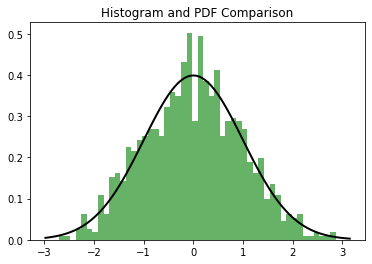

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate events from a normal distribution
mu, sigma = 0, 1  # mean and standard deviation
events = np.random.normal(mu, sigma, 1000)

# Plot the histogram of the events
plt.hist(events, bins=50, density=True, alpha=0.6, color='g')

# Plot the actual distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x - mu)/sigma)**2) / (sigma * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.title("Histogram and PDF Comparison")
plt.show()
